# Process Explained:

##Steps taken for pre-processing:

### Products dataframe:
- brand, quantity were extracted from product name
- mask type was deduced from their product descriptions
- target_audience was extracted from product name, some masks have adult or child specified and others were classified as generic


#### After this, both dataframes were merged


### Merged dataframe:
- reviewText and translated reviewText were merged so that the column would only have english text
- The following columns were removed:
        ['reviewText',
        'abuseCount',
        'helpfulNo',
        'helpfulYes',
        'id',
        'imagesCount',
        'productId',
        'profileInfo.ugcSummary.answerCount',
        'profileInfo.ugcSummary.reviewCount',
        'reviewed',
        'score',
        'languageCode.1',
        'translation.reviewTitle',
        'product_id',
        'price_currency',
        'product_url',
        'source_url',
        'product_availability']
- Reasons for removing them have been specified further in the pre-processing section. These columns didn't offer much useful information as they were biased, and some of them were repeated


### Textual Data Treatment: 
- nltk library was used
- Textual data was tokenized, i.e., seperated into a list of words
- Then all the stopwords were removed
- And then after lemmatization, POS tagging was done
- All the nouns were extracted and stored in a newly created column called reviewtextnouns

## Visualizations done for each question:

### Q1: Which are the most popular face masks out there?
- Bar graphs were used as they're good to represent two-dimensional information with one dimension being quantitative and second being categorical
- Number of reviews with respect to different brands
- Mean ratings with respect to different brands
- Number of reviews with respect to different products
- Mean rating with respect to different products
- Reviews per day for each product
    - This was calculated because some of the products were relatively newer on the website and I wanted to see if the products with most amount of reviews get higher reviews per day or not

#### Findings:
- Mean rating visualizations didn't help much because all the ratings were in a relatively similar range
- Number of reviews visualizations, however, did help and you can see them in the later section

### Q2: What do consumers like about them? Why?
- Wordclouds were used as they're good for summarizing textual information such as frequency of words
- Good (ratingValue of 4 or 5) vs Bad reviews(ratingValue of 1 or 2)
- Wordcloud for reviews related to three most popular brands
- Wordcloud for reviews related to 5 most popular products

####Findings:
- Looking at the common words in these wordclouds helped me identify most important features for users across the reviews

### Q3: What different profiles of consumers buy masks?
- While not enough data was available for segmentation, I still managed to find 2-3 ways of segmenting customers
- Pie chart was used for segmentation where there were 2 or 3 segments, otherwise a bar plot was used
- Registered vs Non-registered users
    - This is to track user behaviour. If we got more users to sign up then it could help us generate more data
- Number of Reviews per Language
    - While this doesn't translate directly to nationality, it does give us some information about the demographic background of the user
- Buying Preference: Single mask, small pack or large pack
    - If the user has signed up, their purchasing history can be tracked and we can see if the user is buying for themselves, or if they have a large family, etc.
- Disposable vs Reusable
    - Which type of mask is more preferable?


 ***P.S. Analysis + Visualization section starts from page 46 in the pdf***

#Importing Libraries and Dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

In [1]:
!gdown "1MJdif7gN_NFdX5l88J9mjZZURbmCiPUu&confirm=t"
!gdown "1BzNUJ-xUDwVjPEQS0Mk2oDtMWFRKoaWt&confirm=t"

Downloading...
From: https://drive.google.com/uc?id=1MJdif7gN_NFdX5l88J9mjZZURbmCiPUu&confirm=t
To: /content/products.xls
100% 6.12k/6.12k [00:00<00:00, 7.52MB/s]
Downloading...
From: https://drive.google.com/uc?id=1BzNUJ-xUDwVjPEQS0Mk2oDtMWFRKoaWt&confirm=t
To: /content/reviews.xls
100% 1.38M/1.38M [00:00<00:00, 107MB/s]


In [ ]:
path_reviews = "/content/reviews.xls"
path_products = "/content/products.xls"

In [ ]:
reviews = pd.read_csv(path_reviews, delimiter = '	')
reviews.head()

abuseCount customerNickname  helpfulNo  helpfulYes  \
0           0   iHerb Customer          0           6   
1           0   iHerb Customer          0           0   
2           0   iHerb Customer          0           0   
3           0     InnaIgorevna          0           0   
4           0   iHerb Customer          0           0   

                                     id  imagesCount languageCode  \
0  05c2b17e-c28d-4792-930d-27e787d8d4ad            1        en-US   
1  80e44af8-2edf-4b81-a80a-7e7888d03cc0            0        ru-RU   
2  9a76e047-21e4-4da3-8b50-9d2396519b6b            0        en-US   
3  2890ac54-8707-418e-be3e-8d46231e3672            0        ru-RU   
4  9db33354-0457-4efa-bc9c-b5f7ee0eff31            0        ru-RU   

                 postedDate  productId  profileInfo.ugcSummary.answerCount  \
0  2021-01-27T09:04:10.569Z     103839                                 0.0   
1  2021-02-07T00:56:39.055Z     103839                                 0.0   
2  2021-02-06T21:40:02.886Z     103839                                 0.0   
3  2021-02-05T16:29:28.906Z     103839                                 0.0   
4  2021-02-05T09:43:42.367Z     103839                                 0.0   

   profileInfo.ugcSummary.reviewCount  ratingValue  \
0                                34.0           50   
1                                37.0           50   
2                                 3.0           40   
3                                16.0           40   
4                                19.0           50   

                                          reviewText             reviewTitle  \
0  The mask quality and the color is good. It fit...  Dotted Pattern Is Nice   
1            Внуку очень понравилось. Удобная маска.              Прекрасно!   
2              Easy to put on & comfortable to wear.                    Good   
3  Тонкая, приятная к телу маска. Расцветка тоже ...                  Хорошо   
4  Отличная маска! Мне подошла идеально. Слегка е...              Прекрасно!   

   reviewed       score languageCode.1  \
0      True  1614071051          en-US   
1     False  1612659399          ru-RU   
2     False  1612647603          en-US   
3     False  1612542569          ru-RU   
4     False  1612518222          ru-RU   

                              translation.reviewText translation.reviewTitle  
0                                                NaN                     NaN  
1    The grandson really liked it. Comfortable mask.                   en-US  
2                                                NaN                     NaN  
3  A thin mask that is pleasant to the body. I li...                   en-US  
4  Great mask! It suited me perfectly. There is a...                   en-US

In [ ]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3849 entries, 0 to 3848
Data columns (total 19 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   abuseCount                          3849 non-null   int64  
 1   customerNickname                    3849 non-null   object 
 2   helpfulNo                           3849 non-null   int64  
 3   helpfulYes                          3849 non-null   int64  
 4   id                                  3849 non-null   object 
 5   imagesCount                         3849 non-null   int64  
 6   languageCode                        3849 non-null   object 
 7   postedDate                          3849 non-null   object 
 8   productId                           3849 non-null   int64  
 9   profileInfo.ugcSummary.answerCount  3843 non-null   float64
 10  profileInfo.ugcSummary.reviewCount  3843 non-null   float64
 11  ratingValue                         3849 no

In [ ]:
products = pd.read_csv(path_products, delimiter = '	')
products.head()

product_id                                       product_name  \
0      103205  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
1      101774  HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
2      101955  SunJoy, KN95, Professional Protective Disposab...   
3      103838         Lozperi, Copper Mask, Adult, Black, 1 Mask   
4      102734        Zidian, Disposable Protective Mask, 50 Pack   

   product_price price_currency       product_availability  \
0           2.95            AUD  http://schema.org/InStock   
1           2.95            AUD  http://schema.org/InStock   
2           8.86            AUD  http://schema.org/InStock   
3           6.85            AUD  http://schema.org/InStock   
4          15.35            AUD  http://schema.org/InStock   

                                         product_url  \
0  https://au.iherb.com/pr/Hwipure-Disposable-KF9...   
1  https://au.iherb.com/pr/HIGUARD-Disposable-KF9...   
2  https://au.iherb.com/pr/SunJoy-KN95-Profession...   
3  https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...   
4  https://au.iherb.com/pr/Zidian-Disposable-Prot...   

                                     source_url  
0  https://au.iherb.com/c/protective-face-masks  
1  https://au.iherb.com/c/protective-face-masks  
2  https://au.iherb.com/c/protective-face-masks  
3  https://au.iherb.com/c/protective-face-masks  
4  https://au.iherb.com/c/protective-face-masks

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            27 non-null     int64  
 1   product_name          27 non-null     object 
 2   product_price         27 non-null     float64
 3   price_currency        27 non-null     object 
 4   product_availability  27 non-null     object 
 5   product_url           27 non-null     object 
 6   source_url            27 non-null     object 
dtypes: float64(1), int64(1), object(5)
memory usage: 1.6+ KB


#Data Pre-Processing

## Breaking up the products dataframe - extracting brand, mask type, quantitity, target audience, price per unit 

In [ ]:
products['product_name_split'] = products.product_name.apply(lambda x: x.split(','))
products.head()

product_id                                       product_name  \
0      103205  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
1      101774  HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
2      101955  SunJoy, KN95, Professional Protective Disposab...   
3      103838         Lozperi, Copper Mask, Adult, Black, 1 Mask   
4      102734        Zidian, Disposable Protective Mask, 50 Pack   

   product_price price_currency       product_availability  \
0           2.95            AUD  http://schema.org/InStock   
1           2.95            AUD  http://schema.org/InStock   
2           8.86            AUD  http://schema.org/InStock   
3           6.85            AUD  http://schema.org/InStock   
4          15.35            AUD  http://schema.org/InStock   

                                         product_url  \
0  https://au.iherb.com/pr/Hwipure-Disposable-KF9...   
1  https://au.iherb.com/pr/HIGUARD-Disposable-KF9...   
2  https://au.iherb.com/pr/SunJoy-KN95-Profession...   
3  https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...   
4  https://au.iherb.com/pr/Zidian-Disposable-Prot...   

                                     source_url  \
0  https://au.iherb.com/c/protective-face-masks   
1  https://au.iherb.com/c/protective-face-masks   
2  https://au.iherb.com/c/protective-face-masks   
3  https://au.iherb.com/c/protective-face-masks   
4  https://au.iherb.com/c/protective-face-masks   

                                  product_name_split  
0  [Hwipure,  Disposable KF94 ( N95 / KN95/ FFP2 ...  
1  [HIGUARD,  Disposable KF94 ( N95 / KN95/ FFP2 ...  
2  [SunJoy,  KN95,  Professional Protective Dispo...  
3   [Lozperi,  Copper Mask,  Adult,  Black,  1 Mask]  
4    [Zidian,  Disposable Protective Mask,  50 Pack]

In [ ]:
products['brand'] = products.product_name_split.apply(lambda x: x[0])
products

product_id                                       product_name  \
0       103205  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
1       101774  HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
2       101955  SunJoy, KN95, Professional Protective Disposab...   
3       103838         Lozperi, Copper Mask, Adult, Black, 1 Mask   
4       102734        Zidian, Disposable Protective Mask, 50 Pack   
5       100837  La Hauteur, Disposable KF94 ( N95 / KN95/ FFP2...   
6       100840  YJ Corporation, Disposable KF94 ( N95 / KN95/ ...   
7       103204  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
8       103840          Lozperi, Copper Mask, Adult, Gray, 1 Mask   
9       103743               Puritas, 10 Days Mask, Large, 3 Pack   
10      102522  Dr. Puri, Disposable KF94 ( N95 / KN95/ FFP2 )...   
11      103839          Lozperi, Copper Mask, Adult, Dot, 1 Count   
12      104023     Kosette, PM 2.5 Replaceable Filter, 24 Filters   
13      101692  Kitsch, 100% Cotton Reusable Face Masks, Neutr...   
14      100839  One Fine Day, Disposable KF94 ( N95 / KN95/ FF...   
15      100237  Kitsch, 100% Cotton Reuseable Face Masks, Leop...   
16      103841          Lozperi, Copper Mask, Kids, Black, 1 Mask   
17       99830  Kosette, Nano Reusable Face Protection Mask, M...   
18      104022  Kosette, Fashion Mask with Filter Pocket,  3 M...   
19       99829  Kosette, Nano Reusable Face Protection Mask, L...   
20      103842          Lozperi, Copper Mask, Kids, Gray, 1 Count   
21      102455            Now Foods, Face Mask, Grey, S-M, 1 Mask   
22      101691  Kitsch, 100% Cotton Reuseable Face Masks, Blus...   
23      100541       Tony Moly, CTT KN95 Respirator Mask, 5 Count   
24      100099  Luseta Beauty, Disposable Protection Face Mask...   
25      100234  Luseta Beauty, Disposable Protection Face Mask...   
26      101029  Landsberg, 3 Ply Disposable Protective Face Ma...   

    product_price price_currency       product_availability  \
0            2.95            AUD  http://schema.org/InStock   
1            2.95            AUD  http://schema.org/InStock   
2            8.86            AUD  http://schema.org/InStock   
3            6.85            AUD  http://schema.org/InStock   
4           15.35            AUD  http://schema.org/InStock   
5            5.61            AUD  http://schema.org/InStock   
6            3.93            AUD  http://schema.org/InStock   
7           50.19            AUD  http://schema.org/InStock   
8            6.85            AUD  http://schema.org/InStock   
9            6.61            AUD  http://schema.org/InStock   
10          47.24            AUD  http://schema.org/InStock   
11           6.85            AUD  http://schema.org/InStock   
12           5.91            AUD  http://schema.org/InStock   
13          17.72            AUD  http://schema.org/InStock   
14           4.49            AUD  http://schema.org/InStock   
15          17.72            AUD  http://schema.org/InStock   
16           6.85            AUD  http://schema.org/InStock   
17          22.44            AUD  http://schema.org/InStock   
18          11.81            AUD  http://schema.org/InStock   
19          22.44            AUD  http://schema.org/InStock   
20           6.85            AUD  http://schema.org/InStock   
21           2.95            AUD  http://schema.org/InStock   
22          17.72            AUD  http://schema.org/InStock   
23          26.57            AUD  http://schema.org/InStock   
24          49.61            AUD  http://schema.org/InStock   
25          44.31            AUD  http://schema.org/InStock   
26          36.54            AUD  http://schema.org/InStock   

                                          product_url  \
0   https://au.iherb.com/pr/Hwipure-Disposable-KF9...   
1   https://au.iherb.com/pr/HIGUARD-Disposable-KF9...   
2   https://au.iherb.com/pr/SunJoy-KN95-Profession...   
3   https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...   
4   https://au.iherb.

In [ ]:
products['mask_type'] = products.product_name_split.apply(lambda x: x[1])
products

product_id                                       product_name  \
0       103205  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
1       101774  HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
2       101955  SunJoy, KN95, Professional Protective Disposab...   
3       103838         Lozperi, Copper Mask, Adult, Black, 1 Mask   
4       102734        Zidian, Disposable Protective Mask, 50 Pack   
5       100837  La Hauteur, Disposable KF94 ( N95 / KN95/ FFP2...   
6       100840  YJ Corporation, Disposable KF94 ( N95 / KN95/ ...   
7       103204  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
8       103840          Lozperi, Copper Mask, Adult, Gray, 1 Mask   
9       103743               Puritas, 10 Days Mask, Large, 3 Pack   
10      102522  Dr. Puri, Disposable KF94 ( N95 / KN95/ FFP2 )...   
11      103839          Lozperi, Copper Mask, Adult, Dot, 1 Count   
12      104023     Kosette, PM 2.5 Replaceable Filter, 24 Filters   
13      101692  Kitsch, 100% Cotton Reusable Face Masks, Neutr...   
14      100839  One Fine Day, Disposable KF94 ( N95 / KN95/ FF...   
15      100237  Kitsch, 100% Cotton Reuseable Face Masks, Leop...   
16      103841          Lozperi, Copper Mask, Kids, Black, 1 Mask   
17       99830  Kosette, Nano Reusable Face Protection Mask, M...   
18      104022  Kosette, Fashion Mask with Filter Pocket,  3 M...   
19       99829  Kosette, Nano Reusable Face Protection Mask, L...   
20      103842          Lozperi, Copper Mask, Kids, Gray, 1 Count   
21      102455            Now Foods, Face Mask, Grey, S-M, 1 Mask   
22      101691  Kitsch, 100% Cotton Reuseable Face Masks, Blus...   
23      100541       Tony Moly, CTT KN95 Respirator Mask, 5 Count   
24      100099  Luseta Beauty, Disposable Protection Face Mask...   
25      100234  Luseta Beauty, Disposable Protection Face Mask...   
26      101029  Landsberg, 3 Ply Disposable Protective Face Ma...   

    product_price price_currency       product_availability  \
0            2.95            AUD  http://schema.org/InStock   
1            2.95            AUD  http://schema.org/InStock   
2            8.86            AUD  http://schema.org/InStock   
3            6.85            AUD  http://schema.org/InStock   
4           15.35            AUD  http://schema.org/InStock   
5            5.61            AUD  http://schema.org/InStock   
6            3.93            AUD  http://schema.org/InStock   
7           50.19            AUD  http://schema.org/InStock   
8            6.85            AUD  http://schema.org/InStock   
9            6.61            AUD  http://schema.org/InStock   
10          47.24            AUD  http://schema.org/InStock   
11           6.85            AUD  http://schema.org/InStock   
12           5.91            AUD  http://schema.org/InStock   
13          17.72            AUD  http://schema.org/InStock   
14           4.49            AUD  http://schema.org/InStock   
15          17.72            AUD  http://schema.org/InStock   
16           6.85            AUD  http://schema.org/InStock   
17          22.44            AUD  http://schema.org/InStock   
18          11.81            AUD  http://schema.org/InStock   
19          22.44            AUD  http://schema.org/InStock   
20           6.85            AUD  http://schema.org/InStock   
21           2.95            AUD  http://schema.org/InStock   
22          17.72            AUD  http://schema.org/InStock   
23          26.57            AUD  http://schema.org/InStock   
24          49.61            AUD  http://schema.org/InStock   
25          44.31            AUD  http://schema.org/InStock   
26          36.54            AUD  http://schema.org/InStock   

                                          product_url  \
0   https://au.iherb.com/pr/Hwipure-Disposable-KF9...   
1   https://au.iherb.com/pr/HIGUARD-Disposable-KF9...   
2   https://au.iherb.com/pr/SunJoy-KN95-Profession...   
3   https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...   
4   https://au.iherb.

In [ ]:
products.loc[2, 'mask_type'] = 'KN95 Disposable Face Mask'

In [ ]:
#Adding these manually after looking at the data
products['quantity'] = [1,1,10,1,50,1,1,25,1,3,20,1,24,3,1,3,1,1,3,1,1,1,3,5,50,50,50]
products

product_id                                       product_name  \
0       103205  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
1       101774  HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
2       101955  SunJoy, KN95, Professional Protective Disposab...   
3       103838         Lozperi, Copper Mask, Adult, Black, 1 Mask   
4       102734        Zidian, Disposable Protective Mask, 50 Pack   
5       100837  La Hauteur, Disposable KF94 ( N95 / KN95/ FFP2...   
6       100840  YJ Corporation, Disposable KF94 ( N95 / KN95/ ...   
7       103204  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
8       103840          Lozperi, Copper Mask, Adult, Gray, 1 Mask   
9       103743               Puritas, 10 Days Mask, Large, 3 Pack   
10      102522  Dr. Puri, Disposable KF94 ( N95 / KN95/ FFP2 )...   
11      103839          Lozperi, Copper Mask, Adult, Dot, 1 Count   
12      104023     Kosette, PM 2.5 Replaceable Filter, 24 Filters   
13      101692  Kitsch, 100% Cotton Reusable Face Masks, Neutr...   
14      100839  One Fine Day, Disposable KF94 ( N95 / KN95/ FF...   
15      100237  Kitsch, 100% Cotton Reuseable Face Masks, Leop...   
16      103841          Lozperi, Copper Mask, Kids, Black, 1 Mask   
17       99830  Kosette, Nano Reusable Face Protection Mask, M...   
18      104022  Kosette, Fashion Mask with Filter Pocket,  3 M...   
19       99829  Kosette, Nano Reusable Face Protection Mask, L...   
20      103842          Lozperi, Copper Mask, Kids, Gray, 1 Count   
21      102455            Now Foods, Face Mask, Grey, S-M, 1 Mask   
22      101691  Kitsch, 100% Cotton Reuseable Face Masks, Blus...   
23      100541       Tony Moly, CTT KN95 Respirator Mask, 5 Count   
24      100099  Luseta Beauty, Disposable Protection Face Mask...   
25      100234  Luseta Beauty, Disposable Protection Face Mask...   
26      101029  Landsberg, 3 Ply Disposable Protective Face Ma...   

    product_price price_currency       product_availability  \
0            2.95            AUD  http://schema.org/InStock   
1            2.95            AUD  http://schema.org/InStock   
2            8.86            AUD  http://schema.org/InStock   
3            6.85            AUD  http://schema.org/InStock   
4           15.35            AUD  http://schema.org/InStock   
5            5.61            AUD  http://schema.org/InStock   
6            3.93            AUD  http://schema.org/InStock   
7           50.19            AUD  http://schema.org/InStock   
8            6.85            AUD  http://schema.org/InStock   
9            6.61            AUD  http://schema.org/InStock   
10          47.24            AUD  http://schema.org/InStock   
11           6.85            AUD  http://schema.org/InStock   
12           5.91            AUD  http://schema.org/InStock   
13          17.72            AUD  http://schema.org/InStock   
14           4.49            AUD  http://schema.org/InStock   
15          17.72            AUD  http://schema.org/InStock   
16           6.85            AUD  http://schema.org/InStock   
17          22.44            AUD  http://schema.org/InStock   
18          11.81            AUD  http://schema.org/InStock   
19          22.44            AUD  http://schema.org/InStock   
20           6.85            AUD  http://schema.org/InStock   
21           2.95            AUD  http://schema.org/InStock   
22          17.72            AUD  http://schema.org/InStock   
23          26.57            AUD  http://schema.org/InStock   
24          49.61            AUD  http://schema.org/InStock   
25          44.31            AUD  http://schema.org/InStock   
26          36.54            AUD  http://schema.org/InStock   

                                          product_url  \
0   https://au.iherb.com/pr/Hwipure-Disposable-KF9...   
1   https://au.iherb.com/pr/HIGUARD-Disposable-KF9...   
2   https://au.iherb.com/pr/SunJoy-KN95-Profession...   
3   https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...   
4   https://au.iherb.

In [ ]:
#Classifying masks based on adults, kids or generic
products['target_audience'] = ['generic', 'generic', 'generic', 'adult', 'generic', 'generic', 'kids', 'generic', 'adult', 'generic','generic', 'adult', 'generic', 'generic', 'generic', 'generic','kids', 'generic', 'generic', 'generic', 'kids', 'generic', 'generic', 'generic', 'generic', 'generic', 'generic']
products[['product_name', 'brand', 'mask_type', 'quantity', 'target_audience']]

product_name           brand  \
0   Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...         Hwipure   
1   HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...         HIGUARD   
2   SunJoy, KN95, Professional Protective Disposab...          SunJoy   
3          Lozperi, Copper Mask, Adult, Black, 1 Mask         Lozperi   
4         Zidian, Disposable Protective Mask, 50 Pack          Zidian   
5   La Hauteur, Disposable KF94 ( N95 / KN95/ FFP2...      La Hauteur   
6   YJ Corporation, Disposable KF94 ( N95 / KN95/ ...  YJ Corporation   
7   Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...         Hwipure   
8           Lozperi, Copper Mask, Adult, Gray, 1 Mask         Lozperi   
9                Puritas, 10 Days Mask, Large, 3 Pack         Puritas   
10  Dr. Puri, Disposable KF94 ( N95 / KN95/ FFP2 )...        Dr. Puri   
11          Lozperi, Copper Mask, Adult, Dot, 1 Count         Lozperi   
12     Kosette, PM 2.5 Replaceable Filter, 24 Filters         Kosette   
13  Kitsch, 100% Cotton Reusable Face Masks, Neutr...          Kitsch   
14  One Fine Day, Disposable KF94 ( N95 / KN95/ FF...    One Fine Day   
15  Kitsch, 100% Cotton Reuseable Face Masks, Leop...          Kitsch   
16          Lozperi, Copper Mask, Kids, Black, 1 Mask         Lozperi   
17  Kosette, Nano Reusable Face Protection Mask, M...         Kosette   
18  Kosette, Fashion Mask with Filter Pocket,  3 M...         Kosette   
19  Kosette, Nano Reusable Face Protection Mask, L...         Kosette   
20          Lozperi, Copper Mask, Kids, Gray, 1 Count         Lozperi   
21            Now Foods, Face Mask, Grey, S-M, 1 Mask       Now Foods   
22  Kitsch, 100% Cotton Reuseable Face Masks, Blus...          Kitsch   
23       Tony Moly, CTT KN95 Respirator Mask, 5 Count       Tony Moly   
24  Luseta Beauty, Disposable Protection Face Mask...   Luseta Beauty   
25  Luseta Beauty, Disposable Protection Face Mask...   Luseta Beauty   
26  Landsberg, 3 Ply Disposable Protective Face Ma...       Landsberg   

                                     mask_type  quantity target_audience  
0    Disposable KF94 ( N95 / KN95/ FFP2 ) Mask         1         generic  
1    Disposable KF94 ( N95 / KN95/ FFP2 ) Mask         1         generic  
2                    KN95 Disposable Face Mask        10         generic  
3                                  Copper Mask         1           adult  
4                   Disposable Protective Mask        50         generic  
5    Disposable KF94 ( N95 / KN95/ FFP2 ) Mask         1         generic  
6    Disposable KF94 ( N95 / KN95/ FFP2 ) Mask         1            kids  
7    Disposable KF94 ( N95 / KN95/ FFP2 ) Mask        25         generic  
8                                  Copper Mask         1           adult  
9                                 10 Days Mask         3         generic  
10   Disposable KF94 ( N95 / KN95/ FFP2 ) Mask        20         generic  
11                                 Copper Mask         1           adult  
12                   PM 2.5 Replaceable Filter        24         generic  
13             100% Cotton Reusable Face Masks         3         generic  
14   Disposable KF94 ( N95 / KN95/ FFP2 ) Mask         1         generic  
15            100% Cotton Reuseable Face Masks         3         generic  
16                                 Copper Mask         1            kids  
17          Nano Reusable Face Protection Mask         1         generic  
18             Fashion Mask with Filter Pocket         3         generic  
19          Nano Reusable Face Protection Mask         1         generic  
20                                 Copper Mask         1            kids  
21                                   Face Mask         1         generic  
22            100% Cotton Reuseable Face Masks         3         generic  
23                    CTT KN95 Respirator Mask         5         generic  
24             Disposable Protection Face Mask        50         generic  
25             Disposable Protection Face Mask

In [ ]:
#3 masks are specifically for kids, 3 masks are specifically for adults
products.target_audience.value_counts()

generic    21
adult       3
kids        3
Name: target_audience, dtype: int64

In [ ]:
products['price_per_unit'] = round(products.product_price / products.quantity, 2)
products

product_id                                       product_name  \
0       103205  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
1       101774  HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
2       101955  SunJoy, KN95, Professional Protective Disposab...   
3       103838         Lozperi, Copper Mask, Adult, Black, 1 Mask   
4       102734        Zidian, Disposable Protective Mask, 50 Pack   
5       100837  La Hauteur, Disposable KF94 ( N95 / KN95/ FFP2...   
6       100840  YJ Corporation, Disposable KF94 ( N95 / KN95/ ...   
7       103204  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
8       103840          Lozperi, Copper Mask, Adult, Gray, 1 Mask   
9       103743               Puritas, 10 Days Mask, Large, 3 Pack   
10      102522  Dr. Puri, Disposable KF94 ( N95 / KN95/ FFP2 )...   
11      103839          Lozperi, Copper Mask, Adult, Dot, 1 Count   
12      104023     Kosette, PM 2.5 Replaceable Filter, 24 Filters   
13      101692  Kitsch, 100% Cotton Reusable Face Masks, Neutr...   
14      100839  One Fine Day, Disposable KF94 ( N95 / KN95/ FF...   
15      100237  Kitsch, 100% Cotton Reuseable Face Masks, Leop...   
16      103841          Lozperi, Copper Mask, Kids, Black, 1 Mask   
17       99830  Kosette, Nano Reusable Face Protection Mask, M...   
18      104022  Kosette, Fashion Mask with Filter Pocket,  3 M...   
19       99829  Kosette, Nano Reusable Face Protection Mask, L...   
20      103842          Lozperi, Copper Mask, Kids, Gray, 1 Count   
21      102455            Now Foods, Face Mask, Grey, S-M, 1 Mask   
22      101691  Kitsch, 100% Cotton Reuseable Face Masks, Blus...   
23      100541       Tony Moly, CTT KN95 Respirator Mask, 5 Count   
24      100099  Luseta Beauty, Disposable Protection Face Mask...   
25      100234  Luseta Beauty, Disposable Protection Face Mask...   
26      101029  Landsberg, 3 Ply Disposable Protective Face Ma...   

    product_price price_currency       product_availability  \
0            2.95            AUD  http://schema.org/InStock   
1            2.95            AUD  http://schema.org/InStock   
2            8.86            AUD  http://schema.org/InStock   
3            6.85            AUD  http://schema.org/InStock   
4           15.35            AUD  http://schema.org/InStock   
5            5.61            AUD  http://schema.org/InStock   
6            3.93            AUD  http://schema.org/InStock   
7           50.19            AUD  http://schema.org/InStock   
8            6.85            AUD  http://schema.org/InStock   
9            6.61            AUD  http://schema.org/InStock   
10          47.24            AUD  http://schema.org/InStock   
11           6.85            AUD  http://schema.org/InStock   
12           5.91            AUD  http://schema.org/InStock   
13          17.72            AUD  http://schema.org/InStock   
14           4.49            AUD  http://schema.org/InStock   
15          17.72            AUD  http://schema.org/InStock   
16           6.85            AUD  http://schema.org/InStock   
17          22.44            AUD  http://schema.org/InStock   
18          11.81            AUD  http://schema.org/InStock   
19          22.44            AUD  http://schema.org/InStock   
20           6.85            AUD  http://schema.org/InStock   
21           2.95            AUD  http://schema.org/InStock   
22          17.72            AUD  http://schema.org/InStock   
23          26.57            AUD  http://schema.org/InStock   
24          49.61            AUD  http://schema.org/InStock   
25          44.31            AUD  http://schema.org/InStock   
26          36.54            AUD  http://schema.org/InStock   

                                          product_url  \
0   https://au.iherb.com/pr/Hwipure-Disposable-KF9...   
1   https://au.iherb.com/pr/HIGUARD-Disposable-KF9...   
2   https://au.iherb.com/pr/SunJoy-KN95-Profession...   
3   https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...   
4   https://au.iherb.

In [ ]:
products.mask_type.value_counts()

 Disposable KF94 ( N95 / KN95/ FFP2 ) Mask    7
 Copper Mask                                  5
 100% Cotton Reuseable Face Masks             2
 Nano Reusable Face Protection Mask           2
 Disposable Protection Face Mask              2
KN95 Disposable Face Mask                     1
 Disposable Protective Mask                   1
 10 Days Mask                                 1
 PM 2.5 Replaceable Filter                    1
 100% Cotton Reusable Face Masks              1
 Fashion Mask with Filter Pocket              1
 Face Mask                                    1
 CTT KN95 Respirator Mask                     1
 3 Ply Disposable Protective Face Mask        1
Name: mask_type, dtype: int64

In [ ]:
#This generalization has been done based on product descriptions
d = {
    ' Disposable KF94 ( N95 / KN95/ FFP2 ) Mask':'medical',
    ' Copper Mask':'reusable',
    ' 100% Cotton Reuseable Face Masks':'reusable',
    ' Nano Reusable Face Protection Mask':'reusable',
    ' Disposable Protection Face Mask':'disposable',
    'KN95 Disposable Face Mask':'medical',
    ' Disposable Protective Mask':'disposable',
    ' 10 Days Mask':'disposable',
    ' PM 2.5 Replaceable Filter':'reusable',
    ' 100% Cotton Reusable Face Masks':'reusable',
    ' Fashion Mask with Filter Pocket':'reusable',
    ' Face Mask':'reusable',
    ' CTT KN95 Respirator Mask':'medical',
    ' 3 Ply Disposable Protective Face Mask':'disposable'
}

products.mask_type = products.mask_type.map(d)
products.head()

product_id                                       product_name  \
0      103205  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
1      101774  HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
2      101955  SunJoy, KN95, Professional Protective Disposab...   
3      103838         Lozperi, Copper Mask, Adult, Black, 1 Mask   
4      102734        Zidian, Disposable Protective Mask, 50 Pack   

   product_price price_currency       product_availability  \
0           2.95            AUD  http://schema.org/InStock   
1           2.95            AUD  http://schema.org/InStock   
2           8.86            AUD  http://schema.org/InStock   
3           6.85            AUD  http://schema.org/InStock   
4          15.35            AUD  http://schema.org/InStock   

                                         product_url  \
0  https://au.iherb.com/pr/Hwipure-Disposable-KF9...   
1  https://au.iherb.com/pr/HIGUARD-Disposable-KF9...   
2  https://au.iherb.com/pr/SunJoy-KN95-Profession...   
3  https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...   
4  https://au.iherb.com/pr/Zidian-Disposable-Prot...   

                                     source_url  \
0  https://au.iherb.com/c/protective-face-masks   
1  https://au.iherb.com/c/protective-face-masks   
2  https://au.iherb.com/c/protective-face-masks   
3  https://au.iherb.com/c/protective-face-masks   
4  https://au.iherb.com/c/protective-face-masks   

                                  product_name_split    brand   mask_type  \
0  [Hwipure,  Disposable KF94 ( N95 / KN95/ FFP2 ...  Hwipure     medical   
1  [HIGUARD,  Disposable KF94 ( N95 / KN95/ FFP2 ...  HIGUARD     medical   
2  [SunJoy,  KN95,  Professional Protective Dispo...   SunJoy     medical   
3   [Lozperi,  Copper Mask,  Adult,  Black,  1 Mask]  Lozperi    reusable   
4    [Zidian,  Disposable Protective Mask,  50 Pack]   Zidian  disposable   

   quantity target_audience  price_per_unit  
0         1         generic            2.95  
1         1         generic            2.95  
2        10         generic            0.89  
3         1           adult            6.85  
4        50         generic            0.31

In [ ]:
products['prod_name_short'] = products.product_name_split.apply(lambda x: x[0]+" "+x[1])
products.head()

product_id                                       product_name  \
0      103205  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
1      101774  HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
2      101955  SunJoy, KN95, Professional Protective Disposab...   
3      103838         Lozperi, Copper Mask, Adult, Black, 1 Mask   
4      102734        Zidian, Disposable Protective Mask, 50 Pack   

   product_price price_currency       product_availability  \
0           2.95            AUD  http://schema.org/InStock   
1           2.95            AUD  http://schema.org/InStock   
2           8.86            AUD  http://schema.org/InStock   
3           6.85            AUD  http://schema.org/InStock   
4          15.35            AUD  http://schema.org/InStock   

                                         product_url  \
0  https://au.iherb.com/pr/Hwipure-Disposable-KF9...   
1  https://au.iherb.com/pr/HIGUARD-Disposable-KF9...   
2  https://au.iherb.com/pr/SunJoy-KN95-Profession...   
3  https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...   
4  https://au.iherb.com/pr/Zidian-Disposable-Prot...   

                                     source_url  \
0  https://au.iherb.com/c/protective-face-masks   
1  https://au.iherb.com/c/protective-face-masks   
2  https://au.iherb.com/c/protective-face-masks   
3  https://au.iherb.com/c/protective-face-masks   
4  https://au.iherb.com/c/protective-face-masks   

                                  product_name_split    brand   mask_type  \
0  [Hwipure,  Disposable KF94 ( N95 / KN95/ FFP2 ...  Hwipure     medical   
1  [HIGUARD,  Disposable KF94 ( N95 / KN95/ FFP2 ...  HIGUARD     medical   
2  [SunJoy,  KN95,  Professional Protective Dispo...   SunJoy     medical   
3   [Lozperi,  Copper Mask,  Adult,  Black,  1 Mask]  Lozperi    reusable   
4    [Zidian,  Disposable Protective Mask,  50 Pack]   Zidian  disposable   

   quantity target_audience  price_per_unit  \
0         1         generic            2.95   
1         1         generic            2.95   
2        10         generic            0.89   
3         1           adult            6.85   
4        50         generic            0.31   

                                     prod_name_short  
0  Hwipure  Disposable KF94 ( N95 / KN95/ FFP2 ) ...  
1  HIGUARD  Disposable KF94 ( N95 / KN95/ FFP2 ) ...  
2                                       SunJoy  KN95  
3                               Lozperi  Copper Mask  
4                 Zidian  Disposable Protective Mask

In [ ]:
products[['product_name', 'prod_name_short']]

product_name  \
0   Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
1   HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
2   SunJoy, KN95, Professional Protective Disposab...   
3          Lozperi, Copper Mask, Adult, Black, 1 Mask   
4         Zidian, Disposable Protective Mask, 50 Pack   
5   La Hauteur, Disposable KF94 ( N95 / KN95/ FFP2...   
6   YJ Corporation, Disposable KF94 ( N95 / KN95/ ...   
7   Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
8           Lozperi, Copper Mask, Adult, Gray, 1 Mask   
9                Puritas, 10 Days Mask, Large, 3 Pack   
10  Dr. Puri, Disposable KF94 ( N95 / KN95/ FFP2 )...   
11          Lozperi, Copper Mask, Adult, Dot, 1 Count   
12     Kosette, PM 2.5 Replaceable Filter, 24 Filters   
13  Kitsch, 100% Cotton Reusable Face Masks, Neutr...   
14  One Fine Day, Disposable KF94 ( N95 / KN95/ FF...   
15  Kitsch, 100% Cotton Reuseable Face Masks, Leop...   
16          Lozperi, Copper Mask, Kids, Black, 1 Mask   
17  Kosette, Nano Reusable Face Protection Mask, M...   
18  Kosette, Fashion Mask with Filter Pocket,  3 M...   
19  Kosette, Nano Reusable Face Protection Mask, L...   
20          Lozperi, Copper Mask, Kids, Gray, 1 Count   
21            Now Foods, Face Mask, Grey, S-M, 1 Mask   
22  Kitsch, 100% Cotton Reuseable Face Masks, Blus...   
23       Tony Moly, CTT KN95 Respirator Mask, 5 Count   
24  Luseta Beauty, Disposable Protection Face Mask...   
25  Luseta Beauty, Disposable Protection Face Mask...   
26  Landsberg, 3 Ply Disposable Protective Face Ma...   

                                      prod_name_short  
0   Hwipure  Disposable KF94 ( N95 / KN95/ FFP2 ) ...  
1   HIGUARD  Disposable KF94 ( N95 / KN95/ FFP2 ) ...  
2                                        SunJoy  KN95  
3                                Lozperi  Copper Mask  
4                  Zidian  Disposable Protective Mask  
5   La Hauteur  Disposable KF94 ( N95 / KN95/ FFP2...  
6   YJ Corporation  Disposable KF94 ( N95 / KN95/ ...  
7   Hwipure  Disposable KF94 ( N95 / KN95/ FFP2 ) ...  
8                                Lozperi  Copper Mask  
9                               Puritas  10 Days Mask  
10  Dr. Puri  Disposable KF94 ( N95 / KN95/ FFP2 )...  
11                               Lozperi  Copper Mask  
12                 Kosette  PM 2.5 Replaceable Filter  
13            Kitsch  100% Cotton Reusable Face Masks  
14  One Fine Day  Disposable KF94 ( N95 / KN95/ FF...  
15           Kitsch  100% Cotton Reuseable Face Masks  
16                               Lozperi  Copper Mask  
17        Kosette  Nano Reusable Face Protection Mask  
18           Kosette  Fashion Mask with Filter Pocket  
19        Kosette  Nano Reusable Face Protection Mask  
20                               Lozperi  Copper Mask  
21                               Now Foods  Face Mask  
22           Kitsch  100% Cotton Reuseable Face Masks  
23                Tony Moly  CTT KN95 Respirator Mask  
24     Luseta Beauty  Disposable Protection Face Mask  
25     Luseta Beauty  Disposable Protection Face Mask  
26   Landsberg  3 Ply Disposable Protective Face Mask

In [ ]:
products.loc[1,'prod_name_short'] = 'Hwipure Disposable 1 Mask'
products.loc[7,'prod_name_short'] = 'Hwipure Disposable 25 Masks'
products.loc[3,'prod_name_short'] = 'Lozperi Copper Mask Adult Black'
products.loc[8,'prod_name_short'] = 'Lozperi Copper Mask Adult Grey'
products.loc[16,'prod_name_short'] = 'Lozperi Copper Mask Kids Black'
products.loc[20,'prod_name_short'] = 'Lozperi Copper Mask Kids Grey'
products.loc[13,'prod_name_short'] = 'Kitsch Cotton Reusable Neutral'
products.loc[15,'prod_name_short'] = 'Kitsch Cotton Reusable Leopard'

In [ ]:
products[['product_name', 'prod_name_short']]

product_name  \
0   Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
1   HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
2   SunJoy, KN95, Professional Protective Disposab...   
3          Lozperi, Copper Mask, Adult, Black, 1 Mask   
4         Zidian, Disposable Protective Mask, 50 Pack   
5   La Hauteur, Disposable KF94 ( N95 / KN95/ FFP2...   
6   YJ Corporation, Disposable KF94 ( N95 / KN95/ ...   
7   Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
8           Lozperi, Copper Mask, Adult, Gray, 1 Mask   
9                Puritas, 10 Days Mask, Large, 3 Pack   
10  Dr. Puri, Disposable KF94 ( N95 / KN95/ FFP2 )...   
11          Lozperi, Copper Mask, Adult, Dot, 1 Count   
12     Kosette, PM 2.5 Replaceable Filter, 24 Filters   
13  Kitsch, 100% Cotton Reusable Face Masks, Neutr...   
14  One Fine Day, Disposable KF94 ( N95 / KN95/ FF...   
15  Kitsch, 100% Cotton Reuseable Face Masks, Leop...   
16          Lozperi, Copper Mask, Kids, Black, 1 Mask   
17  Kosette, Nano Reusable Face Protection Mask, M...   
18  Kosette, Fashion Mask with Filter Pocket,  3 M...   
19  Kosette, Nano Reusable Face Protection Mask, L...   
20          Lozperi, Copper Mask, Kids, Gray, 1 Count   
21            Now Foods, Face Mask, Grey, S-M, 1 Mask   
22  Kitsch, 100% Cotton Reuseable Face Masks, Blus...   
23       Tony Moly, CTT KN95 Respirator Mask, 5 Count   
24  Luseta Beauty, Disposable Protection Face Mask...   
25  Luseta Beauty, Disposable Protection Face Mask...   
26  Landsberg, 3 Ply Disposable Protective Face Ma...   

                                      prod_name_short  
0   Hwipure  Disposable KF94 ( N95 / KN95/ FFP2 ) ...  
1                           Hwipure Disposable 1 Mask  
2                                        SunJoy  KN95  
3                     Lozperi Copper Mask Adult Black  
4                  Zidian  Disposable Protective Mask  
5   La Hauteur  Disposable KF94 ( N95 / KN95/ FFP2...  
6   YJ Corporation  Disposable KF94 ( N95 / KN95/ ...  
7                         Hwipure Disposable 25 Masks  
8                      Lozperi Copper Mask Adult Grey  
9                               Puritas  10 Days Mask  
10  Dr. Puri  Disposable KF94 ( N95 / KN95/ FFP2 )...  
11                               Lozperi  Copper Mask  
12                 Kosette  PM 2.5 Replaceable Filter  
13                     Kitsch Cotton Reusable Neutral  
14  One Fine Day  Disposable KF94 ( N95 / KN95/ FF...  
15                     Kitsch Cotton Reusable Leopard  
16                     Lozperi Copper Mask Kids Black  
17        Kosette  Nano Reusable Face Protection Mask  
18           Kosette  Fashion Mask with Filter Pocket  
19        Kosette  Nano Reusable Face Protection Mask  
20                      Lozperi Copper Mask Kids Grey  
21                               Now Foods  Face Mask  
22           Kitsch  100% Cotton Reuseable Face Masks  
23                Tony Moly  CTT KN95 Respirator Mask  
24     Luseta Beauty  Disposable Protection Face Mask  
25     Luseta Beauty  Disposable Protection Face Mask  
26   Landsberg  3 Ply Disposable Protective Face Mask

In [ ]:
#Removing product_name_split as we won't need it
products.drop('product_name_split', axis = 1, inplace = True)
products.head()

product_id                                       product_name  \
0      103205  Hwipure, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
1      101774  HIGUARD, Disposable KF94 ( N95 / KN95/ FFP2 ) ...   
2      101955  SunJoy, KN95, Professional Protective Disposab...   
3      103838         Lozperi, Copper Mask, Adult, Black, 1 Mask   
4      102734        Zidian, Disposable Protective Mask, 50 Pack   

   product_price price_currency       product_availability  \
0           2.95            AUD  http://schema.org/InStock   
1           2.95            AUD  http://schema.org/InStock   
2           8.86            AUD  http://schema.org/InStock   
3           6.85            AUD  http://schema.org/InStock   
4          15.35            AUD  http://schema.org/InStock   

                                         product_url  \
0  https://au.iherb.com/pr/Hwipure-Disposable-KF9...   
1  https://au.iherb.com/pr/HIGUARD-Disposable-KF9...   
2  https://au.iherb.com/pr/SunJoy-KN95-Profession...   
3  https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...   
4  https://au.iherb.com/pr/Zidian-Disposable-Prot...   

                                     source_url    brand   mask_type  \
0  https://au.iherb.com/c/protective-face-masks  Hwipure     medical   
1  https://au.iherb.com/c/protective-face-masks  HIGUARD     medical   
2  https://au.iherb.com/c/protective-face-masks   SunJoy     medical   
3  https://au.iherb.com/c/protective-face-masks  Lozperi    reusable   
4  https://au.iherb.com/c/protective-face-masks   Zidian  disposable   

   quantity target_audience  price_per_unit  \
0         1         generic            2.95   
1         1         generic            2.95   
2        10         generic            0.89   
3         1           adult            6.85   
4        50         generic            0.31   

                                     prod_name_short  
0  Hwipure  Disposable KF94 ( N95 / KN95/ FFP2 ) ...  
1                          Hwipure Disposable 1 Mask  
2                                       SunJoy  KN95  
3                    Lozperi Copper Mask Adult Black  
4                 Zidian  Disposable Protective Mask

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   product_id            27 non-null     int64  
 1   product_name          27 non-null     object 
 2   product_price         27 non-null     float64
 3   price_currency        27 non-null     object 
 4   product_availability  27 non-null     object 
 5   product_url           27 non-null     object 
 6   source_url            27 non-null     object 
 7   brand                 27 non-null     object 
 8   mask_type             27 non-null     object 
 9   quantity              27 non-null     int64  
 10  target_audience       27 non-null     object 
 11  price_per_unit        27 non-null     float64
 12  prod_name_short       27 non-null     object 
dtypes: float64(2), int64(2), object(9)
memory usage: 2.9+ KB


##Merging the two dataframes and selecting which features to keep and which to remove

In [ ]:
df = reviews.merge(products, how = 'inner', left_on = 'productId', right_on = 'product_id')
df.head()

abuseCount customerNickname  helpfulNo  helpfulYes  \
0           0   iHerb Customer          0           6   
1           0   iHerb Customer          0           0   
2           0   iHerb Customer          0           0   
3           0     InnaIgorevna          0           0   
4           0   iHerb Customer          0           0   

                                     id  imagesCount languageCode  \
0  05c2b17e-c28d-4792-930d-27e787d8d4ad            1        en-US   
1  80e44af8-2edf-4b81-a80a-7e7888d03cc0            0        ru-RU   
2  9a76e047-21e4-4da3-8b50-9d2396519b6b            0        en-US   
3  2890ac54-8707-418e-be3e-8d46231e3672            0        ru-RU   
4  9db33354-0457-4efa-bc9c-b5f7ee0eff31            0        ru-RU   

                 postedDate  productId  profileInfo.ugcSummary.answerCount  \
0  2021-01-27T09:04:10.569Z     103839                                 0.0   
1  2021-02-07T00:56:39.055Z     103839                                 0.0   
2  2021-02-06T21:40:02.886Z     103839                                 0.0   
3  2021-02-05T16:29:28.906Z     103839                                 0.0   
4  2021-02-05T09:43:42.367Z     103839                                 0.0   

   ...  price_currency       product_availability  \
0  ...             AUD  http://schema.org/InStock   
1  ...             AUD  http://schema.org/InStock   
2  ...             AUD  http://schema.org/InStock   
3  ...             AUD  http://schema.org/InStock   
4  ...             AUD  http://schema.org/InStock   

                                         product_url  \
0  https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...   
1  https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...   
2  https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...   
3  https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...   
4  https://au.iherb.com/pr/Lozperi-Copper-Mask-Ad...   

                                     source_url    brand  mask_type quantity  \
0  https://au.iherb.com/c/protective-face-masks  Lozperi   reusable        1   
1  https://au.iherb.com/c/protective-face-masks  Lozperi   reusable        1   
2  https://au.iherb.com/c/protective-face-masks  Lozperi   reusable        1   
3  https://au.iherb.com/c/protective-face-masks  Lozperi   reusable        1   
4  https://au.iherb.com/c/protective-face-masks  Lozperi   reusable        1   

  target_audience price_per_unit       prod_name_short  
0           adult           6.85  Lozperi  Copper Mask  
1           adult           6.85  Lozperi  Copper Mask  
2           adult           6.85  Lozperi  Copper Mask  
3           adult           6.85  Lozperi  Copper Mask  
4           adult           6.85  Lozperi  Copper Mask  

[5 rows x 32 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 3848
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   abuseCount                          3849 non-null   int64  
 1   customerNickname                    3849 non-null   object 
 2   helpfulNo                           3849 non-null   int64  
 3   helpfulYes                          3849 non-null   int64  
 4   id                                  3849 non-null   object 
 5   imagesCount                         3849 non-null   int64  
 6   languageCode                        3849 non-null   object 
 7   postedDate                          3849 non-null   object 
 8   productId                           3849 non-null   int64  
 9   profileInfo.ugcSummary.answerCount  3843 non-null   float64
 10  profileInfo.ugcSummary.reviewCount  3843 non-null   float64
 11  ratingValue                         3849 no

In [ ]:
#Fixing Reviews
mask = df['translation.reviewText'].isnull()
df.loc[mask, 'translation.reviewText'] = df.loc[mask, 'reviewText']
df[['reviewText', 'translation.reviewText']].head()

reviewText  \
0  The mask quality and the color is good. It fit...   
1            Внуку очень понравилось. Удобная маска.   
2              Easy to put on & comfortable to wear.   
3  Тонкая, приятная к телу маска. Расцветка тоже ...   
4  Отличная маска! Мне подошла идеально. Слегка е...   

                              translation.reviewText  
0  The mask quality and the color is good. It fit...  
1    The grandson really liked it. Comfortable mask.  
2              Easy to put on & comfortable to wear.  
3  A thin mask that is pleasant to the body. I li...  
4  Great mask! It suited me perfectly. There is a...

In [ ]:
#We'll drop reviewText later as we've got all the information in translation.reviewText
drop_columns = ['reviewText']

In [ ]:
#Let's check the abusecount
df.abuseCount.value_counts(normalize=True)

0    0.960769
1    0.034035
2    0.003897
3    0.001039
4    0.000260
Name: abuseCount, dtype: float64

In [ ]:
#Heavily Imbalanced. We'll drop it
drop_columns.append('abuseCount')

In [ ]:
#Let's check customerNickname 
df.customerNickname.value_counts(normalize=True)

iHerb Customer      0.878670
Vergissmeinnicht    0.001819
Alexooo             0.001819
iherb2reviews       0.001559
Ancaria             0.001299
                      ...   
Olga L              0.000260
iherbqueen          0.000260
Galina Lina         0.000260
MiHelga             0.000260
Aljawhrah-88        0.000260
Name: customerNickname, Length: 351, dtype: float64

In [ ]:
#87% of the customers are unregistered
df.customerNickname.value_counts()

iHerb Customer      3382
Vergissmeinnicht       7
Alexooo                7
iherb2reviews          6
Ancaria                5
                    ... 
Olga L                 1
iherbqueen             1
Galina Lina            1
MiHelga                1
Aljawhrah-88           1
Name: customerNickname, Length: 351, dtype: int64

In [ ]:
#Registered customers have at max 7 orders.
3849-3382
#467 registered customers

467

In [ ]:
#Checking helpfulNo
df.helpfulNo.value_counts(normalize=True)

0    0.964147
1    0.025981
2    0.006235
3    0.002078
4    0.000520
6    0.000520
5    0.000260
9    0.000260
Name: helpfulNo, dtype: float64

In [ ]:
#Drop this column as it is heavily imbalanced
drop_columns.append('helpfulNo')

In [ ]:
#Checking helpfulYes
df.helpfulYes.value_counts(normalize=True)

0      0.828267
1      0.099766
2      0.033515
3      0.008574
4      0.005456
5      0.004677
6      0.004157
8      0.002078
10     0.001559
20     0.001299
16     0.001039
11     0.001039
31     0.000779
7      0.000779
14     0.000779
13     0.000520
15     0.000520
25     0.000520
9      0.000520
12     0.000520
22     0.000520
24     0.000260
55     0.000260
35     0.000260
68     0.000260
50     0.000260
41     0.000260
139    0.000260
21     0.000260
17     0.000260
95     0.000260
78     0.000260
33     0.000260
Name: helpfulYes, dtype: float64

In [ ]:
#Drop this column too as it is heavily imbalanced
drop_columns.append('helpfulYes')

In [ ]:
#Dropping id as well since we won't need it
drop_columns.append('id')

In [ ]:
#Checking imagesCount
df.imagesCount.value_counts(normalize=True)

0    0.952455
1    0.028059
2    0.010912
3    0.003897
4    0.003637
5    0.001039
Name: imagesCount, dtype: float64

In [ ]:
#Drop this as it is heavily imbalanced
drop_columns.append('imagesCount')

In [ ]:
#Checking languageCode
df.languageCode.value_counts(normalize=True)
#This could be useful to understand consumer profiles

en-US    0.481943
ru-RU    0.337750
ar-SA    0.058976
he-IL    0.043388
ja-JP    0.031437
fr-FR    0.026500
ko-KR    0.004936
zh-TW    0.004936
es-MX    0.003637
zh-CN    0.002858
de-DE    0.002858
pt-BR    0.000779
Name: languageCode, dtype: float64

In [ ]:
#Changing postedDate to DateTime format
df.postedDate = pd.to_datetime(df.postedDate)

In [ ]:
#Dropping productId since we won't need it, we've already merged the two dataframes
drop_columns.append('productId')

In [ ]:
#Checking profileInfo.ugcSummary.answerCount
df['profileInfo.ugcSummary.answerCount'].value_counts(normalize=True)

0.0      0.744731
1.0      0.113193
2.0      0.035909
3.0      0.018996
5.0      0.010148
           ...   
74.0     0.000260
54.0     0.000260
47.0     0.000260
260.0    0.000260
143.0    0.000260
Name: profileInfo.ugcSummary.answerCount, Length: 78, dtype: float64

In [ ]:
#Heavily Imbalanced
drop_columns.append('profileInfo.ugcSummary.answerCount')

In [ ]:
#Checking profileInfo.ugcSummary.reviewCount
df['profileInfo.ugcSummary.reviewCount'].value_counts(normalize=True)

1.0       0.088212
2.0       0.049441
4.0       0.034608
3.0       0.027062
6.0       0.022639
            ...   
1685.0    0.000260
716.0     0.000260
519.0     0.000260
712.0     0.000260
285.0     0.000260
Name: profileInfo.ugcSummary.reviewCount, Length: 376, dtype: float64

In [ ]:
#Heavily Imbalanced
drop_columns.append('profileInfo.ugcSummary.reviewCount')

In [ ]:
#Checking ratingValue
df.ratingValue.value_counts(normalize=True)

50    0.682255
40    0.179787
30    0.074565
10    0.032476
20    0.030917
Name: ratingValue, dtype: float64

In [ ]:
#Converting to a 5 point scale
df.ratingValue = df.ratingValue/10
df.ratingValue.value_counts(normalize=True)

5.0    0.682255
4.0    0.179787
3.0    0.074565
1.0    0.032476
2.0    0.030917
Name: ratingValue, dtype: float64

In [ ]:
#Checking reviewed
df.reviewed.value_counts(normalize=True)

False    0.723824
True     0.276176
Name: reviewed, dtype: float64

In [ ]:
#Most of the data wasn't reviewed. Not entirely sure what this means, so dropping it
drop_columns.append('reviewed')

In [ ]:
#Checking Score
#Some duplicate values but most of them are unique. However, again not 100% Sure what this means.
df.score.value_counts()

1612141896    2
1611275161    2
1612324377    2
1612314897    2
1612201121    2
             ..
1607790925    1
1607785154    1
1607742583    1
1607696638    1
1590529729    1
Name: score, Length: 3762, dtype: int64

In [ ]:
#Let's check the correlation between score and ratingvalue
df[['score', 'ratingValue']].corr()

score  ratingValue
score        1.000000     0.090982
ratingValue  0.090982     1.000000

In [ ]:
#No Correlation, therefore dropping it
drop_columns.append('score')

In [ ]:
#dropping languageCode.1 because it's just repeated
drop_columns+= ['languageCode.1']

In [ ]:
#Checking translation.reviewTitle
df['translation.reviewTitle'].value_counts()

en-US    1994
Name: translation.reviewTitle, dtype: int64

In [ ]:
#Dropping it. It doesn't provide us with any useful information
drop_columns.append('translation.reviewTitle')

In [ ]:
#Dropping product_id as well, this is from merged dataframe
drop_columns.append('product_id')

In [ ]:
#Let's check price_currency
df.price_currency.value_counts()

AUD    3849
Name: price_currency, dtype: int64

In [ ]:
#Dropping this too, this doesn't offer us much information except for the fact that all prices are in AUD
drop_columns.append('price_currency')

In [ ]:
#Dropping product_url, source_url and product_availability
drop_columns += ['product_url', 'source_url', 'product_availability']

In [ ]:
drop_columns

['reviewText',
 'abuseCount',
 'helpfulNo',
 'helpfulYes',
 'id',
 'imagesCount',
 'productId',
 'profileInfo.ugcSummary.answerCount',
 'profileInfo.ugcSummary.reviewCount',
 'reviewed',
 'score',
 'languageCode.1',
 'translation.reviewTitle',
 'product_id',
 'price_currency',
 'product_url',
 'source_url',
 'product_availability']

In [ ]:
df.drop(drop_columns, axis = 1, inplace = True)
df.head()

customerNickname languageCode                       postedDate  ratingValue  \
0   iHerb Customer        en-US 2021-01-27 09:04:10.569000+00:00          5.0   
1   iHerb Customer        ru-RU 2021-02-07 00:56:39.055000+00:00          5.0   
2   iHerb Customer        en-US 2021-02-06 21:40:02.886000+00:00          4.0   
3     InnaIgorevna        ru-RU 2021-02-05 16:29:28.906000+00:00          4.0   
4   iHerb Customer        ru-RU 2021-02-05 09:43:42.367000+00:00          5.0   

              reviewTitle                             translation.reviewText  \
0  Dotted Pattern Is Nice  The mask quality and the color is good. It fit...   
1              Прекрасно!    The grandson really liked it. Comfortable mask.   
2                    Good              Easy to put on & comfortable to wear.   
3                  Хорошо  A thin mask that is pleasant to the body. I li...   
4              Прекрасно!  Great mask! It suited me perfectly. There is a...   

                                product_name  product_price    brand  \
0  Lozperi, Copper Mask, Adult, Dot, 1 Count           6.85  Lozperi   
1  Lozperi, Copper Mask, Adult, Dot, 1 Count           6.85  Lozperi   
2  Lozperi, Copper Mask, Adult, Dot, 1 Count           6.85  Lozperi   
3  Lozperi, Copper Mask, Adult, Dot, 1 Count           6.85  Lozperi   
4  Lozperi, Copper Mask, Adult, Dot, 1 Count           6.85  Lozperi   

  mask_type  quantity target_audience  price_per_unit       prod_name_short  
0  reusable         1           adult            6.85  Lozperi  Copper Mask  
1  reusable         1           adult            6.85  Lozperi  Copper Mask  
2  reusable         1           adult            6.85  Lozperi  Copper Mask  
3  reusable         1           adult            6.85  Lozperi  Copper Mask  
4  reusable         1           adult            6.85  Lozperi  Copper Mask

In [ ]:
#renaming translation.reviewText
df.rename({'translation.reviewText':'reviewText'}, axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 3848
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   customerNickname  3849 non-null   object             
 1   languageCode      3849 non-null   object             
 2   postedDate        3849 non-null   datetime64[ns, UTC]
 3   ratingValue       3849 non-null   float64            
 4   reviewTitle       3849 non-null   object             
 5   reviewText        3849 non-null   object             
 6   product_name      3849 non-null   object             
 7   product_price     3849 non-null   float64            
 8   brand             3849 non-null   object             
 9   mask_type         3849 non-null   object             
 10  quantity          3849 non-null   int64              
 11  target_audience   3849 non-null   object             
 12  price_per_unit    3849 non-null   float64            
 13  pro

## Treating the textual data 

*Note: NLP hasn't been covered in our course, and I'm someone who has recently decided to shift to data science from hospitality. I tried to understand text analysis and I did what I could, learned whatever I could from this 15 minute video (https://www.youtube.com/watch?v=_rB7ZjamPwE&t=737s).*

*I had intended to take up the reviews and plot a wordcloud of all the nouns with respect to the adjectives attached to them, i.e., if a positive adjective is attached to a noun then I'd include it in the wordcloud for positive reviews and vice versa. However, due to lack of in-depth knowledge, all I could manage was to extract nouns from text after lemmatizing the sentence. I've included these nouns in positive or negative wordclouds based on the ratingvalue of the review.*

*Note: I also tried to translate reviewTitle using googletrans but had some issues with the server for translating such a large volume of text*

In [ ]:
import nltk

In [ ]:
#nltk.download('all')

In [ ]:
#Tokenizing Words
from nltk.tokenize import word_tokenize

In [ ]:
df['reviewText']

0       The mask quality and the color is good. It fit...
1         The grandson really liked it. Comfortable mask.
2                   Easy to put on & comfortable to wear.
3       A thin mask that is pleasant to the body. I li...
4       Great mask! It suited me perfectly. There is a...
                              ...                        
3844    Reasonable honest Compnay with honest price \n...
3845                                             Good buy
3846                         Not particularly recommended
3847                                           Stickiness
3848                                                Great
Name: reviewText, Length: 3849, dtype: object

In [ ]:
tokenized = df['reviewText'].apply(lambda x: word_tokenize(str(x)))
tokenized

0       [The, mask, quality, and, the, color, is, good...
1       [The, grandson, really, liked, it, ., Comforta...
2        [Easy, to, put, on, &, comfortable, to, wear, .]
3       [A, thin, mask, that, is, pleasant, to, the, b...
4       [Great, mask, !, It, suited, me, perfectly, .,...
                              ...                        
3844    [Reasonable, honest, Compnay, with, honest, pr...
3845                                          [Good, buy]
3846                     [Not, particularly, recommended]
3847                                         [Stickiness]
3848                                              [Great]
Name: reviewText, Length: 3849, dtype: object

In [ ]:
#Removing stopwords
from nltk.corpus import stopwords
stopwordsset = set(stopwords.words('english'))
print(stopwordsset)

{'about', 'during', 'both', "shouldn't", 'by', 'each', 'now', 'it', "that'll", "should've", 'below', 'his', 'she', "she's", 'they', 'couldn', 'haven', 'hers', 'your', 've', 'mustn', 'against', 'few', 'through', 'are', 'will', 'with', 'we', 'which', 'but', 'didn', 'you', 'nor', 'then', 'o', "don't", "you'll", 'theirs', 'don', 'has', 'ourselves', 'because', 'needn', "isn't", 'further', 'over', 'its', 'd', 'only', 'the', 'again', 'wouldn', 'mightn', 'do', 'off', 'having', 'between', "aren't", 'hasn', 'themselves', 'as', 'there', "mightn't", 'them', 'is', 'does', 'here', 'when', 'some', "hadn't", 'me', 'itself', 'been', 'on', 'had', 'isn', 'shouldn', 'why', "you're", 'their', 'him', "you've", 'himself', 'should', 'out', 'any', 'after', 'ain', 'so', 'yours', 'just', 'weren', "needn't", 'same', 'were', 'own', "doesn't", 'most', 'yourselves', 'no', 'this', 'up', 'too', 'to', 'under', 'shan', 'all', 'until', 'what', 'aren', "couldn't", 'more', 'yourself', 'an', 'once', 'how', 'ma', 'm', 'of', 

In [ ]:
def remove_stopwords(x, stopwordsset = stopwordsset):
    output = []
    for w in x:
        if w.lower() not in stopwordsset:
            output.append(w.lower())
    return output

In [ ]:
sw_removed = tokenized.apply(remove_stopwords)
sw_removed

0       [mask, quality, color, good, ., fits, face, fi...
1       [grandson, really, liked, ., comfortable, mask...
2                    [easy, put, &, comfortable, wear, .]
3          [thin, mask, pleasant, body, ., liked, colors]
4       [great, mask, !, suited, perfectly, ., slight,...
                              ...                        
3844    [reasonable, honest, compnay, honest, price, t...
3845                                          [good, buy]
3846                          [particularly, recommended]
3847                                         [stickiness]
3848                                              [great]
Name: reviewText, Length: 3849, dtype: object

In [ ]:
#lemmatization
from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

lemmatized = sw_removed.apply(lambda x: [lem.lemmatize(w) for w in x])
lemmatized

0       [mask, quality, color, good, ., fit, face, fin...
1       [grandson, really, liked, ., comfortable, mask...
2                    [easy, put, &, comfortable, wear, .]
3           [thin, mask, pleasant, body, ., liked, color]
4       [great, mask, !, suited, perfectly, ., slight,...
                              ...                        
3844    [reasonable, honest, compnay, honest, price, t...
3845                                          [good, buy]
3846                          [particularly, recommended]
3847                                         [stickiness]
3848                                              [great]
Name: reviewText, Length: 3849, dtype: object

In [ ]:
#POS Tagging
postagged = lemmatized.apply(lambda x: nltk.pos_tag(x))
postagged

0       [(mask, NN), (quality, NN), (color, NN), (good...
1       [(grandson, NN), (really, RB), (liked, VBN), (...
2       [(easy, JJ), (put, VBD), (&, CC), (comfortable...
3       [(thin, JJ), (mask, NN), (pleasant, NN), (body...
4       [(great, JJ), (mask, NN), (!, .), (suited, VBN...
                              ...                        
3844    [(reasonable, JJ), (honest, JJS), (compnay, NN...
3845                              [(good, JJ), (buy, NN)]
3846             [(particularly, RB), (recommended, VBD)]
3847                                   [(stickiness, NN)]
3848                                        [(great, JJ)]
Name: reviewText, Length: 3849, dtype: object

In [ ]:
def output_noun(x):
    output = []
    for word, tag in x:
        if tag.startswith('NN'):
            output.append(word)
    return output

In [ ]:
noun_only = postagged.apply(output_noun)
noun_only

0       [mask, quality, color, face, fine]
1                         [grandson, mask]
2                                   [wear]
3            [mask, pleasant, body, color]
4        [mask, smell, quality, excellent]
                       ...                
3844                [compnay, price, time]
3845                                 [buy]
3846                                    []
3847                          [stickiness]
3848                                    []
Name: reviewText, Length: 3849, dtype: object

In [ ]:
df = pd.merge(df, noun_only, left_index = True, right_index = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 3848
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   customerNickname  3849 non-null   object             
 1   languageCode      3849 non-null   object             
 2   postedDate        3849 non-null   datetime64[ns, UTC]
 3   ratingValue       3849 non-null   float64            
 4   reviewTitle       3849 non-null   object             
 5   reviewText_x      3849 non-null   object             
 6   product_name      3849 non-null   object             
 7   product_price     3849 non-null   float64            
 8   brand             3849 non-null   object             
 9   mask_type         3849 non-null   object             
 10  quantity          3849 non-null   int64              
 11  target_audience   3849 non-null   object             
 12  price_per_unit    3849 non-null   float64            
 13  pro

In [ ]:
df.rename({'reviewText_x':'reviewText', 'reviewText_y':'reviewtextnouns'}, axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 3848
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   customerNickname  3849 non-null   object             
 1   languageCode      3849 non-null   object             
 2   postedDate        3849 non-null   datetime64[ns, UTC]
 3   ratingValue       3849 non-null   float64            
 4   reviewTitle       3849 non-null   object             
 5   reviewText        3849 non-null   object             
 6   product_name      3849 non-null   object             
 7   product_price     3849 non-null   float64            
 8   brand             3849 non-null   object             
 9   mask_type         3849 non-null   object             
 10  quantity          3849 non-null   int64              
 11  target_audience   3849 non-null   object             
 12  price_per_unit    3849 non-null   float64            
 13  pro

# Analysis + Visualization

##Q1: Which are the most popular face masks out there?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3849 entries, 0 to 3848
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   customerNickname  3849 non-null   object             
 1   languageCode      3849 non-null   object             
 2   postedDate        3849 non-null   datetime64[ns, UTC]
 3   ratingValue       3849 non-null   float64            
 4   reviewTitle       3849 non-null   object             
 5   reviewText        3849 non-null   object             
 6   product_name      3849 non-null   object             
 7   product_price     3849 non-null   float64            
 8   brand             3849 non-null   object             
 9   mask_type         3849 non-null   object             
 10  quantity          3849 non-null   int64              
 11  target_audience   3849 non-null   object             
 12  price_per_unit    3849 non-null   float64            
 13  pro

In [ ]:
df.brand.value_counts()

Kitsch            896
Kosette           783
SunJoy            658
Zidian            337
La Hauteur        225
Hwipure           168
HIGUARD           168
Tony Moly         145
Luseta Beauty      90
Lozperi            89
Now Foods          68
YJ Corporation     68
Puritas            46
Landsberg          43
Dr. Puri           40
One Fine Day       25
Name: brand, dtype: int64

In [ ]:
hbardim = (12,18)

In [ ]:
plt.style.use('seaborn-whitegrid')

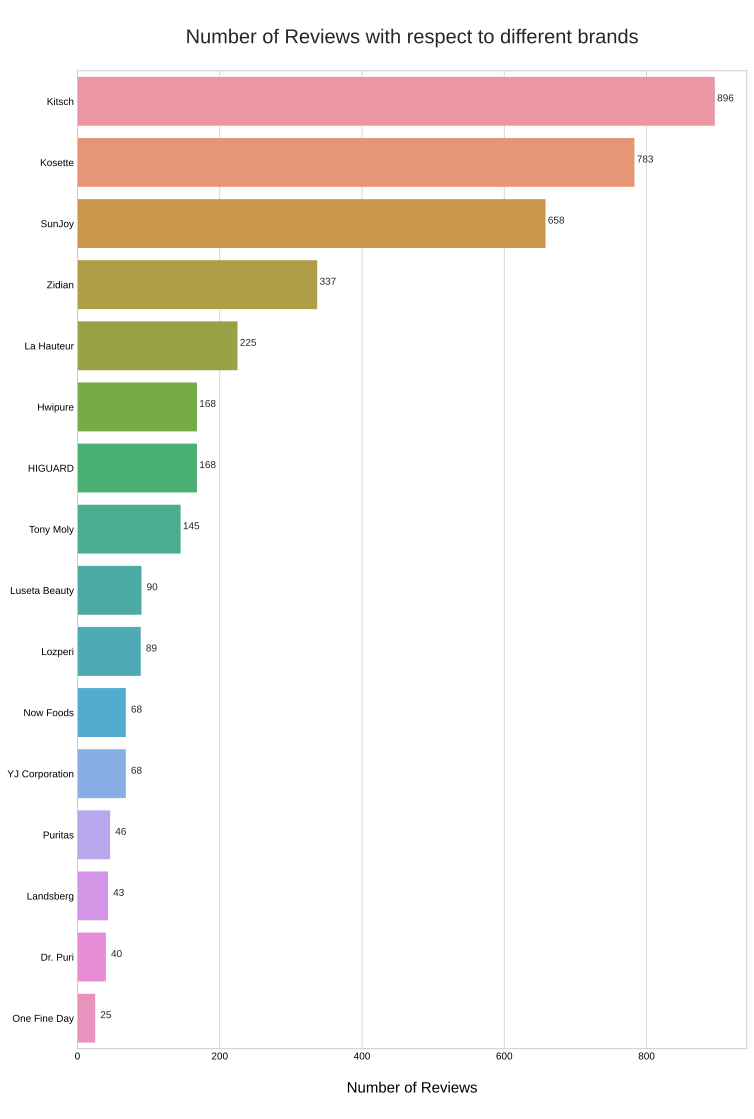

In [ ]:
#Number of reviews with respect to brands

plt.figure(figsize = hbardim)
ax = sns.countplot(y=df.brand, order = df.brand.value_counts().index)
plt.title('\n Number of Reviews with respect to different brands \n', fontdict = {'fontsize':20, 'fontweight':5})
plt.xlabel('\n Number of Reviews \n', fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'})
plt.ylabel('')

for p in ax.patches:
    x = p.get_width() + 15
    y = p.get_y() + p.get_height()/2
    ax.annotate('{:}'.format(p.get_width()), (x,y), ha='center')
ax.yaxis.set_tick_params(labelcolor = 'black')
ax.xaxis.set_tick_params(labelcolor = 'black')
plt.show()

3 Most popular brands:

- Kitsch
- Kosette
- SunJoy

In [ ]:
#Calculating average brand ratings
brand_ratings = df.groupby('brand')['ratingValue'].mean()
brand_ratings.sort_values(ascending=False, inplace=True)
brand_ratings

brand
Zidian            4.649852
Lozperi           4.617978
Hwipure           4.607143
Puritas           4.586957
HIGUARD           4.583333
YJ Corporation    4.558824
La Hauteur        4.551111
Kosette           4.532567
SunJoy            4.428571
Tony Moly         4.427586
Dr. Puri          4.425000
Kitsch            4.334821
One Fine Day      4.120000
Now Foods         4.058824
Landsberg         4.046512
Luseta Beauty     3.733333
Name: ratingValue, dtype: float64

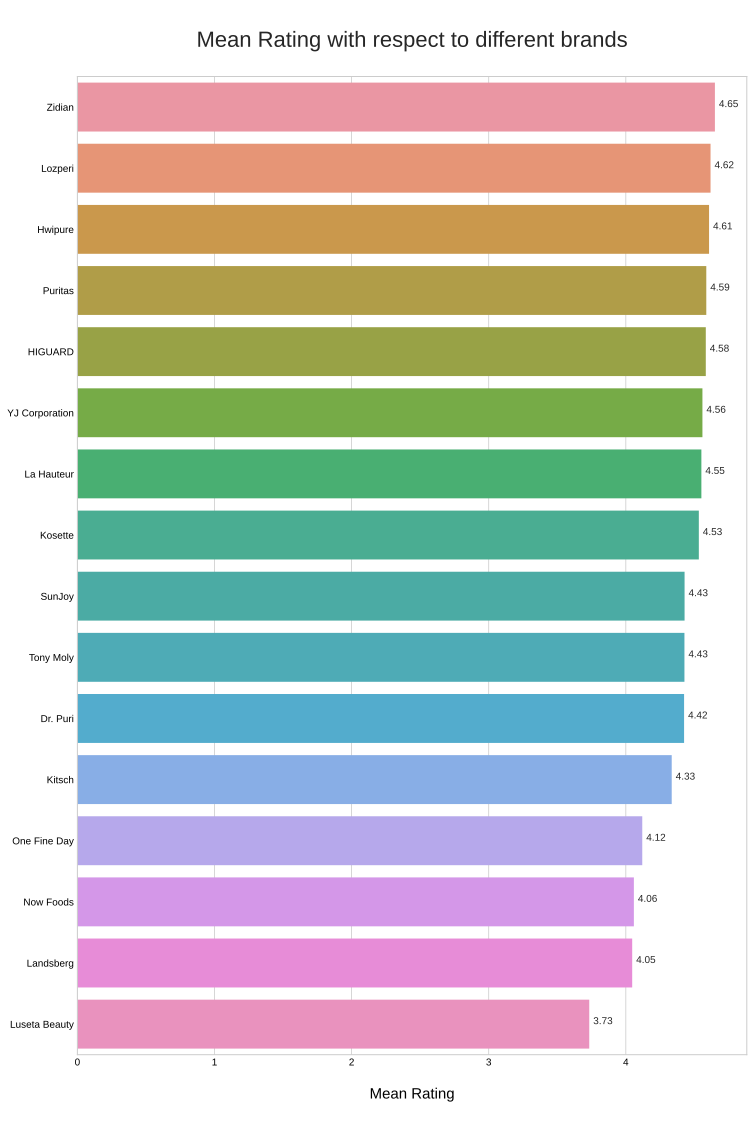

In [ ]:
#Plotting brand ratings on a bar plot

plt.figure(figsize = hbardim)
ax = sns.barplot(x = brand_ratings, y = brand_ratings.index)
plt.title('\nMean Rating with respect to different brands\n' , fontdict = {'fontsize':22, 'fontweight':5})
plt.xlabel('\nMean Rating\n', fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'})
plt.ylabel('')

for p in ax.patches:
    x = p.get_width()+0.1
    y = p.get_y() + p.get_height()/2
    ax.annotate('{:.2f}'.format(p.get_width()), (x,y), ha='center')
ax.yaxis.set_tick_params(labelcolor = 'black')
ax.xaxis.set_tick_params(labelcolor = 'black')
plt.show()

Mean Values are largely along the similar range

In [ ]:
#Which products are popular?
df.prod_name_short.value_counts()

Kosette  Nano Reusable Face Protection Mask                  779
SunJoy  KN95                                                 658
Kitsch Cotton Reusable Leopard                               530
Zidian  Disposable Protective Mask                           337
Kitsch Cotton Reusable Neutral                               259
La Hauteur  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask        225
Hwipure Disposable 1 Mask                                    168
Tony Moly  CTT KN95 Respirator Mask                          145
Hwipure  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask           126
Kitsch  100% Cotton Reuseable Face Masks                     107
Luseta Beauty  Disposable Protection Face Mask                90
YJ Corporation  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask     68
Now Foods  Face Mask                                          68
Puritas  10 Days Mask                                         46
Landsberg  3 Ply Disposable Protective Face Mask              43
Lozperi Copper Mask Adult

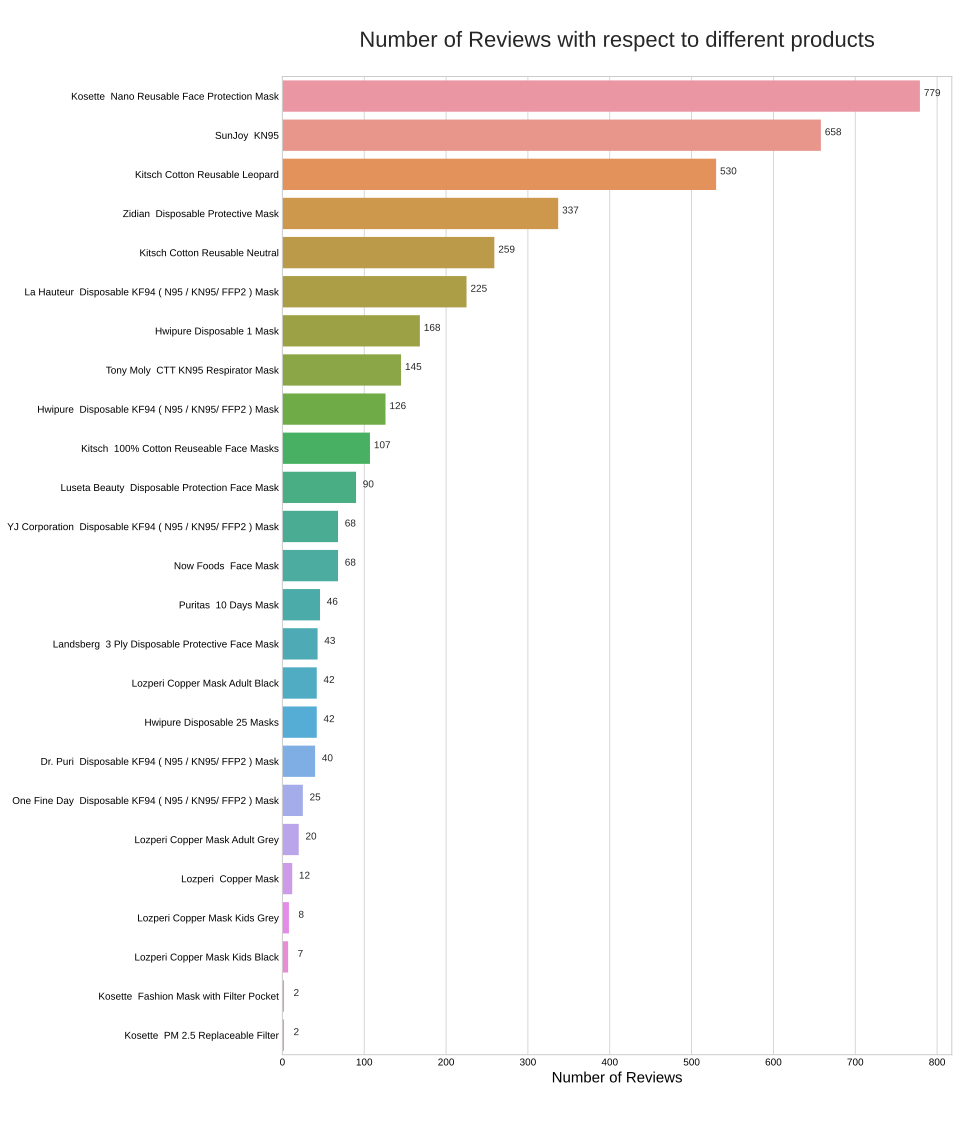

In [ ]:
#Number of reviews with respect to different products

plt.figure(figsize = hbardim)
ax = sns.countplot(y=df.prod_name_short, order = df.prod_name_short.value_counts().index)
plt.title('\nNumber of Reviews with respect to different products\n', fontdict = {'fontsize':22, 'fontweight':5})
plt.xlabel('Number of Reviews\n\n', {'fontsize':15, 'fontweight':5, 'color':'black'})
plt.ylabel('')

for p in ax.patches:
    x = p.get_width() + 15
    y = p.get_y() + p.get_height()/2
    ax.annotate('{:}'.format(p.get_width()), (x,y), ha='center')
ax.yaxis.set_tick_params(labelcolor = 'black')
ax.xaxis.set_tick_params(labelcolor = 'black')
plt.show()

In [ ]:
#Average Ratings of each product
product_ratings = df.groupby('prod_name_short')['ratingValue'].mean()

In [ ]:
product_ratings.sort_values(ascending=False, inplace=True)
product_ratings

prod_name_short
Lozperi  Copper Mask                                         4.833333
Hwipure Disposable 25 Masks                                  4.761905
Lozperi Copper Mask Kids Grey                                4.750000
Lozperi Copper Mask Adult Grey                               4.700000
Zidian  Disposable Protective Mask                           4.649852
Lozperi Copper Mask Adult Black                              4.595238
Puritas  10 Days Mask                                        4.586957
Hwipure Disposable 1 Mask                                    4.583333
YJ Corporation  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask    4.558824
Hwipure  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask           4.555556
La Hauteur  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask        4.551111
Kosette  Nano Reusable Face Protection Mask                  4.534018
Kitsch Cotton Reusable Neutral                               4.501931
Kosette  Fashion Mask with Filter Pocket                     4.500000
Kits

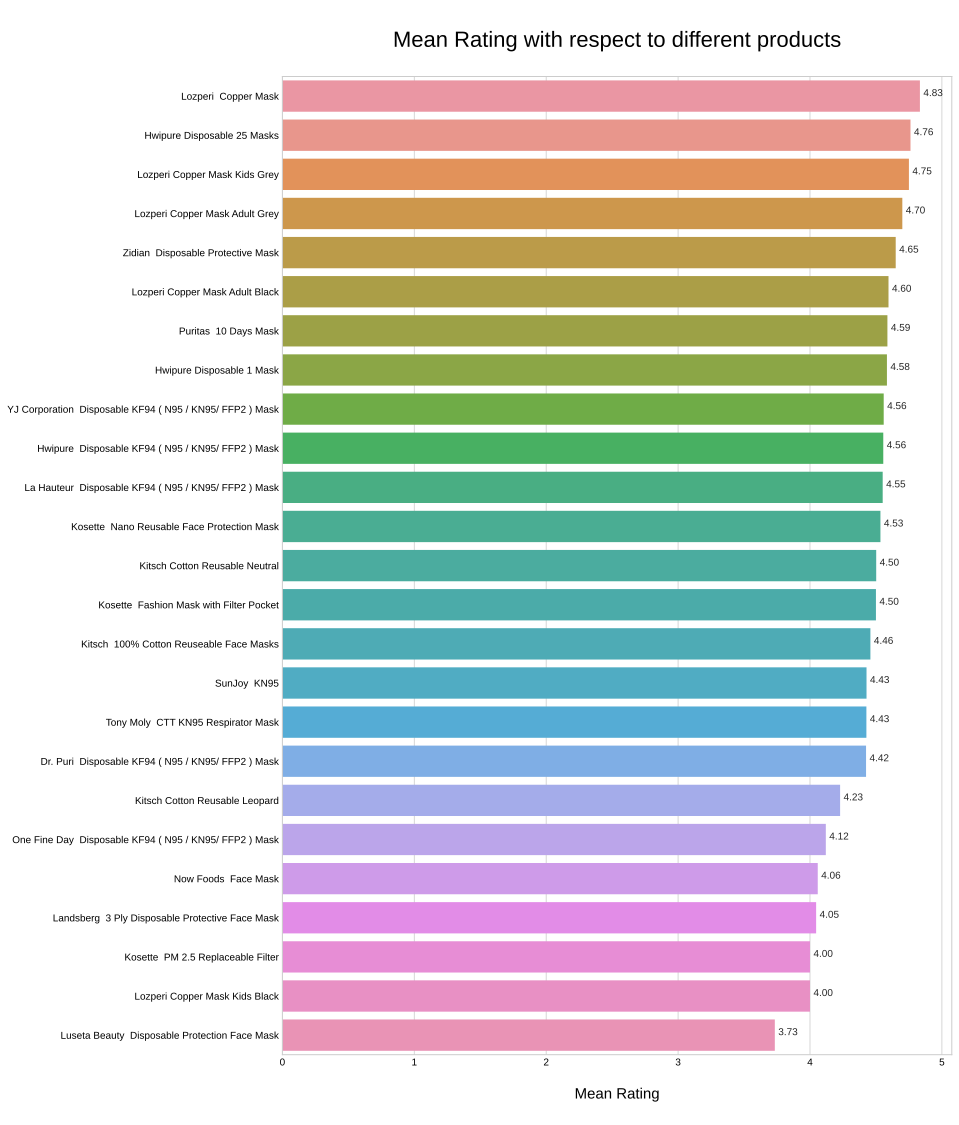

In [ ]:
#Plotting product ratings on a bar plot
plt.figure(figsize = hbardim)
ax = sns.barplot(x = product_ratings, y = product_ratings.index)
plt.title('\nMean Rating with respect to different products\n' , fontdict = {'fontsize':22, 'fontweight':5, 'color':'black'})
plt.xlabel('\nMean Rating\n', fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'})
plt.ylabel('')

for p in ax.patches:
    x = p.get_width() + 0.1
    y = p.get_y() + p.get_height()/2
    ax.annotate('{:.2f}'.format(p.get_width()), (x,y), ha='center')
ax.yaxis.set_tick_params(labelcolor = 'black')
ax.xaxis.set_tick_params(labelcolor = 'black')
plt.show()

Ratings are largely the same for these too

5 most popular products are:

- Kosette  Nano Reusable Face Protection Mask
-SunJoy  KN95
-Kitsch  100% Cotton Reuseable Face Masks (Leopard)
-Zidian  Disposable Protective Mask
-Kitsch  100% Cotton Reusable Face Masks (Neutral)

In [ ]:
#Number of days since minimum review
daysperreview = df.groupby('prod_name_short')['postedDate'].agg([lambda x: round((max(x) - min(x)) / np.timedelta64(1, 'D'),2), 'count'])
daysperreview

<lambda_0>  count
prod_name_short                                                      
Dr. Puri  Disposable KF94 ( N95 / KN95/ FFP2 ) ...       93.74     40
Hwipure  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask       47.13    126
Hwipure Disposable 1 Mask                               134.58    168
Hwipure Disposable 25 Masks                              52.78     42
Kitsch  100% Cotton Reuseable Face Masks                147.01    107
Kitsch Cotton Reusable Leopard                          225.98    530
Kitsch Cotton Reusable Neutral                          144.87    259
Kosette  Fashion Mask with Filter Pocket                  5.64      2
Kosette  Nano Reusable Face Protection Mask             270.31    779
Kosette  PM 2.5 Replaceable Filter                        2.20      2
La Hauteur  Disposable KF94 ( N95 / KN95/ FFP2 ...      205.41    225
Landsberg  3 Ply Disposable Protective Face Mask        198.19     43
Lozperi  Copper Mask                                     17.10     12
Lozperi Copper Mask Adult Black                          21.19     42
Lozperi Copper Mask Adult Grey                           21.20     20
Lozperi Copper Mask Kids Black                           19.67      7
Lozperi Copper Mask Kids Grey                            19.27      8
Luseta Beauty  Disposable Protection Face Mask          258.99     90
Now Foods  Face Mask                                    101.25     68
One Fine Day  Disposable KF94 ( N95 / KN95/ FFP...      199.84     25
Puritas  10 Days Mask                                    31.53     46
SunJoy  KN95                                            148.58    658
Tony Moly  CTT KN95 Respirator Mask                     214.84    145
YJ Corporation  Disposable KF94 ( N95 / KN95/ F...      179.95     68
Zidian  Disposable Protective Mask                       90.41    337

In [ ]:
daysperreview.columns = ['no_of_days', 'no_of_reviews']
daysperreview

no_of_days  no_of_reviews
prod_name_short                                                              
Dr. Puri  Disposable KF94 ( N95 / KN95/ FFP2 ) ...       93.74             40
Hwipure  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask       47.13            126
Hwipure Disposable 1 Mask                               134.58            168
Hwipure Disposable 25 Masks                              52.78             42
Kitsch  100% Cotton Reuseable Face Masks                147.01            107
Kitsch Cotton Reusable Leopard                          225.98            530
Kitsch Cotton Reusable Neutral                          144.87            259
Kosette  Fashion Mask with Filter Pocket                  5.64              2
Kosette  Nano Reusable Face Protection Mask             270.31            779
Kosette  PM 2.5 Replaceable Filter                        2.20              2
La Hauteur  Disposable KF94 ( N95 / KN95/ FFP2 ...      205.41            225
Landsberg  3 Ply Disposable Protective Face Mask        198.19             43
Lozperi  Copper Mask                                     17.10             12
Lozperi Copper Mask Adult Black                          21.19             42
Lozperi Copper Mask Adult Grey                           21.20             20
Lozperi Copper Mask Kids Black                           19.67              7
Lozperi Copper Mask Kids Grey                            19.27              8
Luseta Beauty  Disposable Protection Face Mask          258.99             90
Now Foods  Face Mask                                    101.25             68
One Fine Day  Disposable KF94 ( N95 / KN95/ FFP...      199.84             25
Puritas  10 Days Mask                                    31.53             46
SunJoy  KN95                                            148.58            658
Tony Moly  CTT KN95 Respirator Mask                     214.84            145
YJ Corporation  Disposable KF94 ( N95 / KN95/ F...      179.95             68
Zidian  Disposable Protective Mask                       90.41            337

In [ ]:
daysperreview['reviews/days'] = daysperreview.no_of_reviews/daysperreview.no_of_days
daysperreview.sort_values('reviews/days', ascending=False, inplace=True)
daysperreview

no_of_days  no_of_reviews  \
prod_name_short                                                                 
SunJoy  KN95                                            148.58            658   
Zidian  Disposable Protective Mask                       90.41            337   
Kosette  Nano Reusable Face Protection Mask             270.31            779   
Hwipure  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask       47.13            126   
Kitsch Cotton Reusable Leopard                          225.98            530   
Lozperi Copper Mask Adult Black                          21.19             42   
Kitsch Cotton Reusable Neutral                          144.87            259   
Puritas  10 Days Mask                                    31.53             46   
Hwipure Disposable 1 Mask                               134.58            168   
La Hauteur  Disposable KF94 ( N95 / KN95/ FFP2 ...      205.41            225   
Lozperi Copper Mask Adult Grey                           21.20             20   
Kosette  PM 2.5 Replaceable Filter                        2.20              2   
Hwipure Disposable 25 Masks                              52.78             42   
Kitsch  100% Cotton Reuseable Face Masks                147.01            107   
Lozperi  Copper Mask                                     17.10             12   
Tony Moly  CTT KN95 Respirator Mask                     214.84            145   
Now Foods  Face Mask                                    101.25             68   
Dr. Puri  Disposable KF94 ( N95 / KN95/ FFP2 ) ...       93.74             40   
Lozperi Copper Mask Kids Grey                            19.27              8   
YJ Corporation  Disposable KF94 ( N95 / KN95/ F...      179.95             68   
Lozperi Copper Mask Kids Black                           19.67              7   
Kosette  Fashion Mask with Filter Pocket                  5.64              2   
Luseta Beauty  Disposable Protection Face Mask          258.99             90   
Landsberg  3 Ply Disposable Protective Face Mask        198.19             43   
One Fine Day  Disposable KF94 ( N95 / KN95/ FFP...      199.84             25   

                                                    reviews/days  
prod_name_short                                                   
SunJoy  KN95                                            4.428591  
Zidian  Disposable Protective Mask                      3.727464  
Kosette  Nano Reusable Face Protection Mask             2.881876  
Hwipure  Disposable KF94 ( N95 / KN95/ FFP2 ) Mask      2.673456  
Kitsch Cotton Reusable Leopard                          2.345340  
Lozperi Copper Mask Adult Black                         1.982067  
Kitsch Cotton Reusable Neutral                          1.787810  
Puritas  10 Days Mask                                   1.458928  
Hwipure Disposable 1 Mask                               1.248328  
La Hauteur  Disposable KF94 ( N95 / KN95/ FFP2 ...      1.095370  
Lozperi Copper Mask Adult Grey                          0.943396  
Kosette  PM 2.5 Replaceable Filter                      0.909091  
Hwipure Disposable 25 Masks                             0.795756  
Kitsch  100% Cotton Reuseable Face Masks                0.727842  
Lozperi  Copper Mask                                    0.701754  
Tony Moly  CTT KN95 Respirator Mask                     0.674921  
Now Foods  Face Mask                                    0.671605  
Dr. Puri  Disposable KF94 ( N95 / KN95/ FFP2 ) ...      0.426712  
Lozperi Copper Mask Kids Grey                           0.415153  
YJ Corporation  Disposable KF94 ( N95 / KN95/ F...      0.377883  
Lozperi Copper Mask Kids Black                          0.355872  
Kosette  Fashion Mask with Filter Pocket                0.354610  
Luseta Beauty  Disposable Protection Face Mask          0.347504  
Landsberg  3 Ply Disposable Protective Face Mask        0.216964  
One Fine Day  Disposable KF94 ( N95 / KN95/ FFP...      0.125100

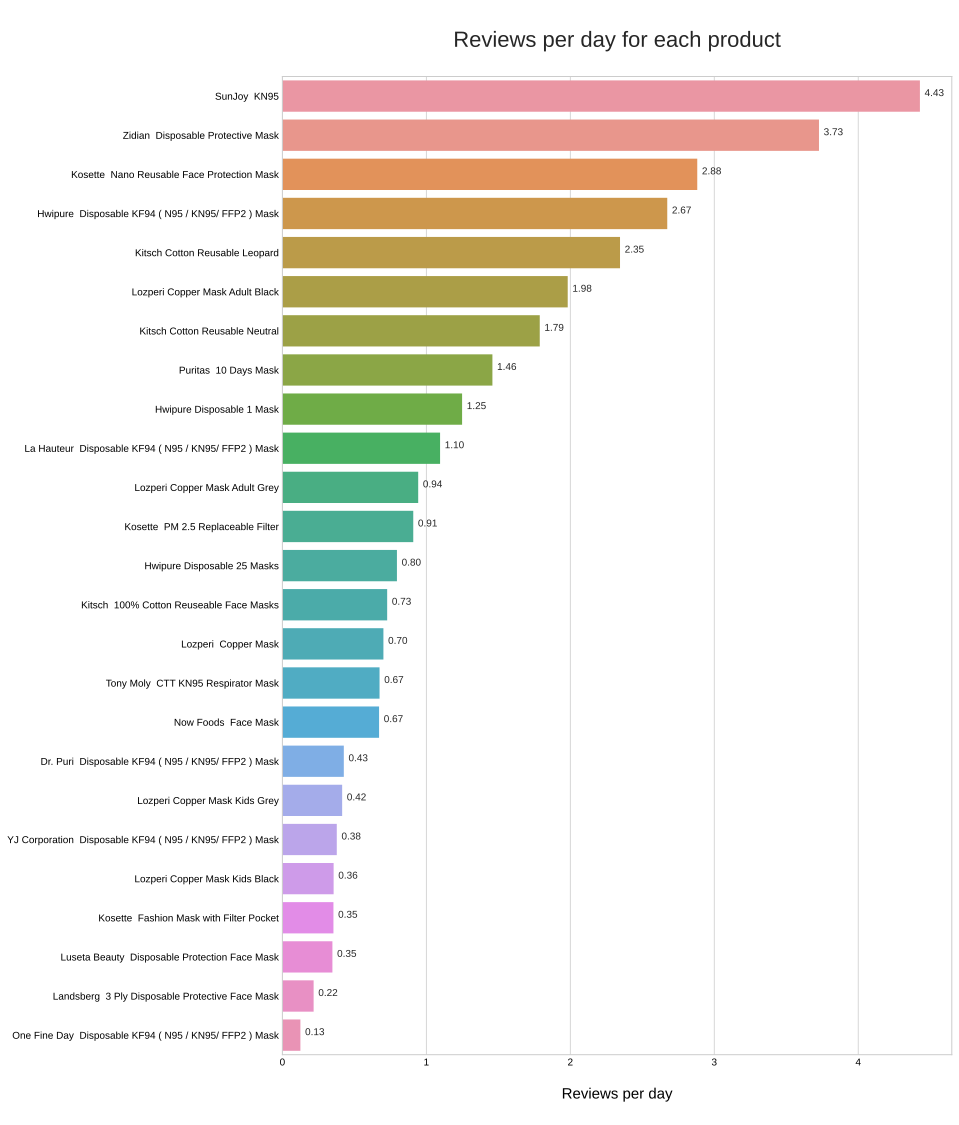

In [ ]:
#Plotting Reviews per day
plt.figure(figsize = hbardim)
ax = sns.barplot(x = daysperreview['reviews/days'], y = daysperreview.index)
plt.title('\nReviews per day for each product\n' , fontdict = {'fontsize':22, 'fontweight':5})
plt.xlabel('\nReviews per day\n', fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'})
plt.ylabel('')

for p in ax.patches:
    x = p.get_width() + 0.1
    y = p.get_y() + p.get_height()/2
    ax.annotate('{:.2f}'.format(p.get_width()), (x,y), ha='center')
ax.yaxis.set_tick_params(labelcolor = 'black')
ax.xaxis.set_tick_params(labelcolor = 'black')
plt.show()

- Sunjoy KN95, Kosette Nano Reusable Face Protection Mask, Zidian Disposable Protective Mask are present in top 5 of both graphs: number of reviews and reviews per day
- Lozperi Copper Mask and Hwipure Disposable don't have as much reviews as the above three mentioned
- Kitsch 100% Cotton (both Neutral and Leopard) are ranked 6th and 7th in reviews per day, therefore these two are highly popular as well

## Q2: What do consumers like about them? Why?

In [ ]:
#Defining functions for drawing wordcloud
from wordcloud import WordCloud, STOPWORDS

def word_freq(l):
    d = {}
    for word in l:
        if word not in d.keys():
            d[word] = 1
        else:
            d[word]+=1
    return d

def wordcloud_draw(ps, title):#ps refers to pandas series
    o = []
    for x in ps:
        o+=x
    d = word_freq(o)
    del d['mask']
    word_cloud = WordCloud(width = 800, height = 800, stopwords = stopwords, background_color = 'white', min_font_size = 10).generate_from_frequencies(d)
    plt.figure(figsize = (10,10), facecolor = None)
    plt.imshow(word_cloud)
    plt.title("\n"+title+"\n", fontdict = {'fontsize':25, 'fontweight':10})
    plt.axis("off")
    plt.show()

## Drawing wordclouds based on ratingValue
- ratingValue of 4 or 5 = Good
- ratingValue of 3 = Neutral
- ratingValue of 1 or 2 = Bad

In [ ]:
good = df[df.ratingValue > 3]
bad = df[df.ratingValue < 3]

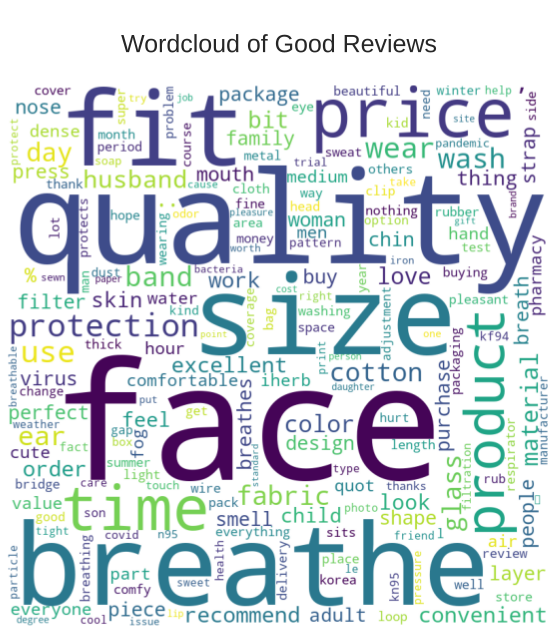

In [ ]:
#Drawing for Good
wordcloud_draw(good.reviewtextnouns, "Wordcloud of Good Reviews")

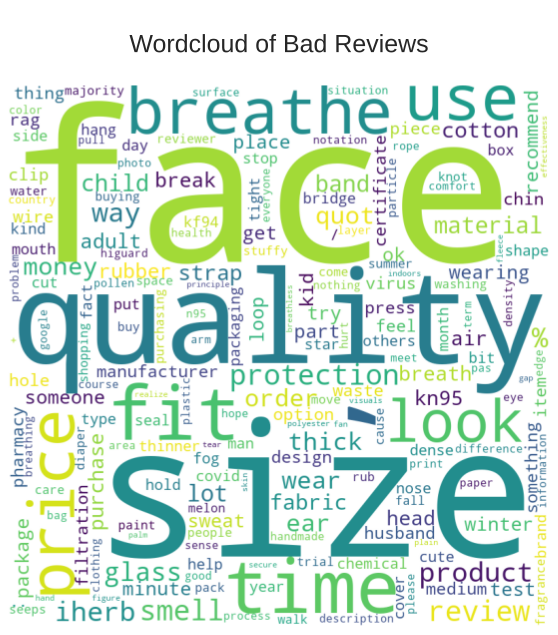

In [ ]:
#Drawing for bad
wordcloud_draw(bad.reviewtextnouns, "Wordcloud of Bad Reviews")

Quality, Face Fit, to be able to breathe easily, price seem to be common across both good review and bad review wordclouds

## Drawing wordcloud for the three most popular brands: Kitsch, Kosette and SunJoy

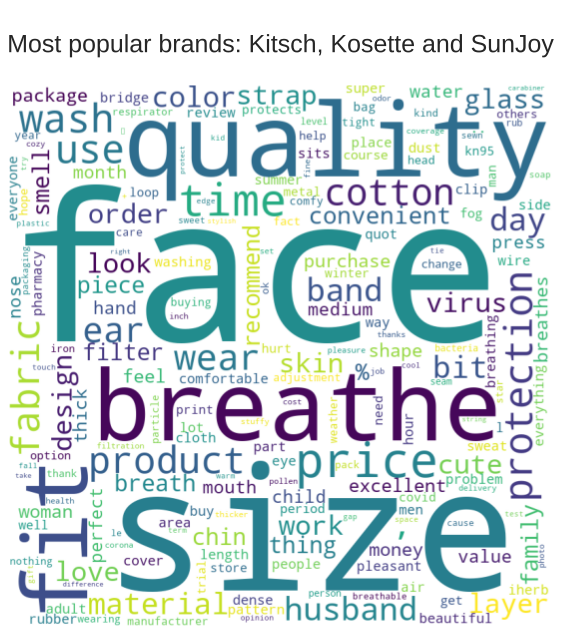

In [ ]:
wordcloud_draw(df[df.brand.isin(['Kitsch', 'Kosette', 'SunJoy'])].reviewtextnouns, "Most popular brands: Kitsch, Kosette and SunJoy")

Again, face fit, quality, breathe, price seem to be most important features

## Drawing wordcloud for five most popular masks

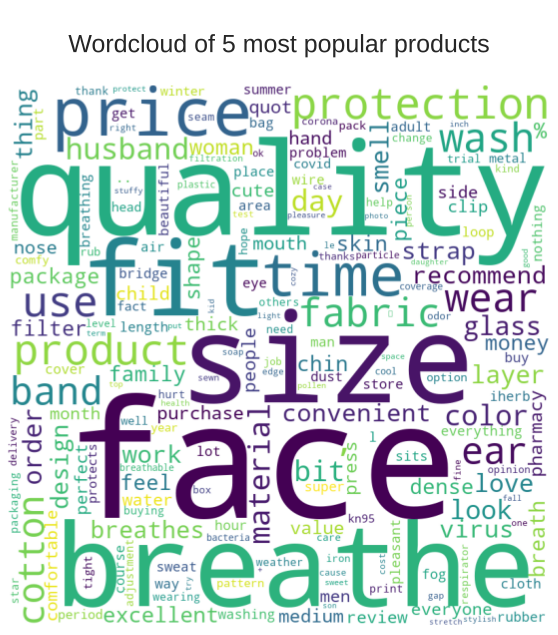

In [ ]:
wordcloud_draw(df[df.prod_name_short.isin(df.prod_name_short.value_counts()[:5].index)].reviewtextnouns, "Wordcloud of 5 most popular products")

Face fit, quality, breathe, price again seem like most important features

## Q3: What different profiles of consumers buy masks?

### Classifying based on registered vs non-registered

In [ ]:
df.customerNickname.value_counts()

iHerb Customer      3382
Vergissmeinnicht       7
Alexooo                7
iherb2reviews          6
Ancaria                5
                    ... 
Olga L                 1
iherbqueen             1
Galina Lina            1
MiHelga                1
Aljawhrah-88           1
Name: customerNickname, Length: 351, dtype: int64

In [ ]:
df.shape

(3849, 15)

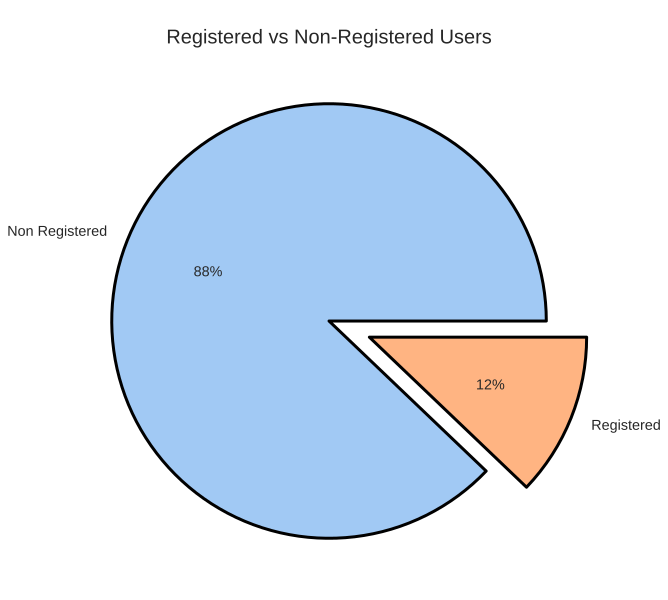

In [ ]:
colors = sns.color_palette('pastel')[0:2]
plt.figure(figsize=(10,10))
plt.pie([3382/3849*100, (3849-3382)/3849*100], 
        labels = ['Non Registered', 'Registered'], 
        wedgeprops={'linewidth':3.0, 'edgecolor':'black'},
        textprops={'size':'x-large'},
        colors = colors, 
        autopct = '%.0f%%', 
        explode = [0, 0.2])
plt.title('\nRegistered vs Non-Registered Users', fontdict = {'fontsize':20, 'fontweight':5})
plt.show()

### Classifying based on language used for review

In [ ]:
m = {'en-US':'English',
     'ru-RU':'Russia',
     'ar-SA':'Arabic',
     'he-IL': 'Hebrew',
     'ja-JP':'Japanese',
     'fr-FR':'French',
     'ko-KR':'Korean',
     'zh-TW':'Taiwanese Mandarin',
     'es-MX':'Spanish(Mexico)',
     'zh-CN':'Chinese',
     'de-DE':'German',
     'pt-BR':'Portugese(Brazil)'}

lang = df.languageCode.map(m).value_counts()
lang

English               1855
Russia                1300
Arabic                 227
Hebrew                 167
Japanese               121
French                 102
Korean                  19
Taiwanese Mandarin      19
Spanish(Mexico)         14
Chinese                 11
German                  11
Portugese(Brazil)        3
Name: languageCode, dtype: int64

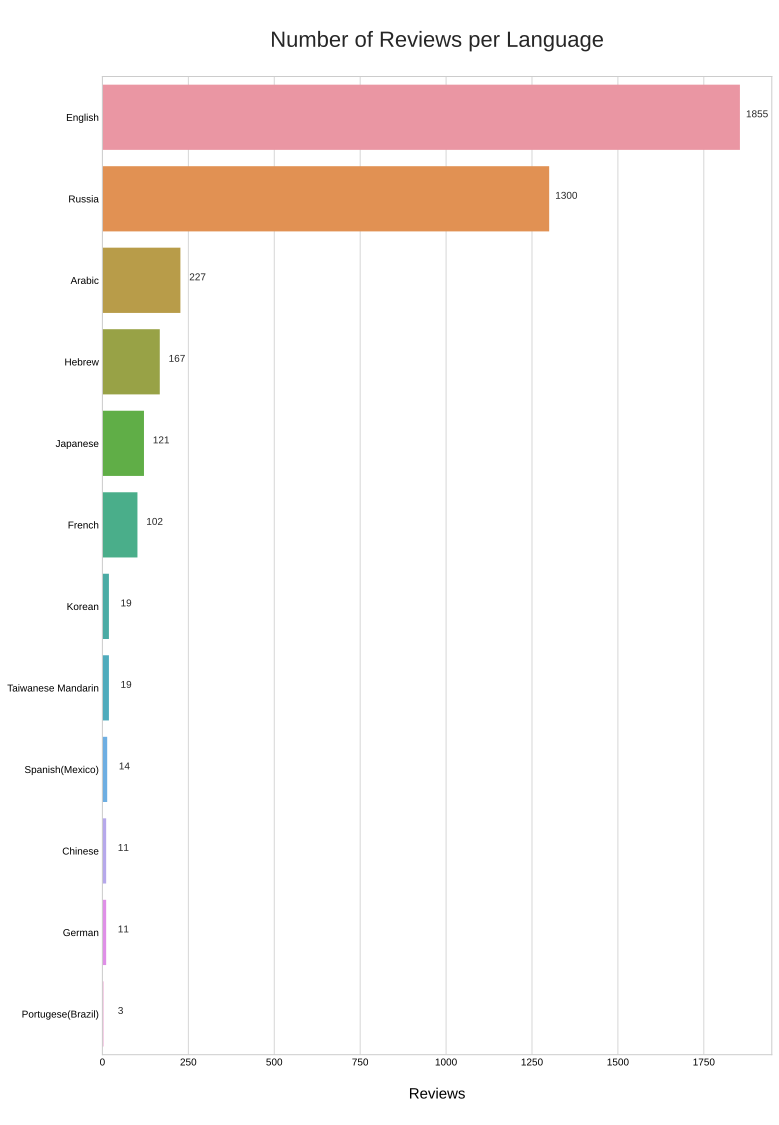

In [ ]:
#Plotting Number of Reviews per Language
plt.figure(figsize = hbardim)
ax = sns.barplot(x = lang, y = lang.index)
plt.title('\nNumber of Reviews per Language\n' , fontdict = {'fontsize':22, 'fontweight':5})
plt.xlabel('\nReviews\n', fontdict = {'fontsize':15, 'fontweight':5, 'color':'black'})
plt.ylabel('')

for p in ax.patches:
    x = p.get_width() + 50
    y = p.get_y() + p.get_height()/2
    ax.annotate('{:.0f}'.format(p.get_width()), (x,y), ha='center')
ax.yaxis.set_tick_params(labelcolor = 'black')
ax.xaxis.set_tick_params(labelcolor = 'black')
plt.show()

In [ ]:
sum(lang)

3849

In [ ]:
labels = ['English', 'Russian', 'Arabic', 'Hebrew', 'Others']
data = [1855, 1300, 227, 167, 121+102+19+19+14+11+11+3]
data = [round(w*100/sum(lang),2) for w in data]
print(data)

[48.19, 33.78, 5.9, 4.34, 7.79]


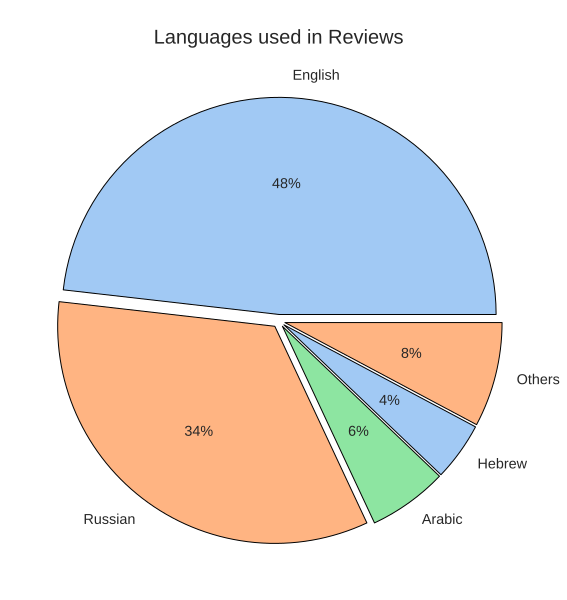

In [ ]:
#Plotting the same information on pie chart with less number of categories
colors = sns.color_palette('pastel')[0:3]
plt.figure(figsize=(10,10))
plt.pie(data, 
        wedgeprops={'linewidth':1.0, 'edgecolor':'black'},
        textprops={'size':'x-large'},
        labels = labels, 
        colors = colors, 
        autopct = '%.0f%%',
        explode = [0.03]*5
        )
plt.title('\nLanguages used in Reviews', fontdict = {'fontsize':20, 'fontweight':5})
plt.show()
#This shows that Russian and English are the most used languages on iHerb

### Classifying based on buying preference
- Single Mask: Product contains a single mask
- Small Pack: Product contains 3 or 5 masks
- Large Pack: Product contains 10 or more masks

In [ ]:
d = {
    1:'single',
    3:'small pack',
    5:'small pack',
    10:'large pack',
     20:'large pack',
     24:'large pack',
     25:'large pack',
     50:'large pack'
}
buy_preference = df.quantity.map(d)
buy_preference

0           single
1           single
2           single
3           single
4           single
           ...    
3844    large pack
3845    large pack
3846    large pack
3847    large pack
3848    large pack
Name: quantity, Length: 3849, dtype: object

In [ ]:
round(buy_preference.value_counts(normalize = True)*100,2)

single        40.22
large pack    31.49
small pack    28.29
Name: quantity, dtype: float64

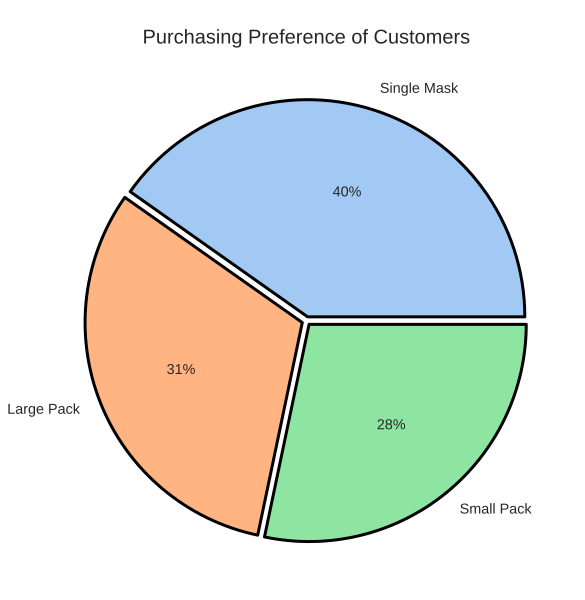

In [ ]:
colors = sns.color_palette('pastel')[0:3]
plt.figure(figsize=(10,10))
plt.pie(round(buy_preference.value_counts(normalize = True)*100,2), 
        wedgeprops={'linewidth':3.0, 'edgecolor':'black'},
        textprops={'size':'x-large'},
        labels = ['Single Mask', 'Large Pack', 'Small Pack'], 
        colors = colors, 
        autopct = '%.0f%%', 
        explode = [0.02, 0.02, 0.02])
plt.title('\nPurchasing Preference of Customers', fontdict = {'fontsize':20, 'fontweight':5})
plt.show()

In [ ]:
#Profiling consumers based on mask type wouldn't work
df.target_audience.value_counts()

generic    3692
kids         83
adult        74
Name: target_audience, dtype: int64

In [ ]:
round(df.mask_type.value_counts(normalize=True), 2)

reusable      0.48
medical       0.39
disposable    0.13
Name: mask_type, dtype: float64

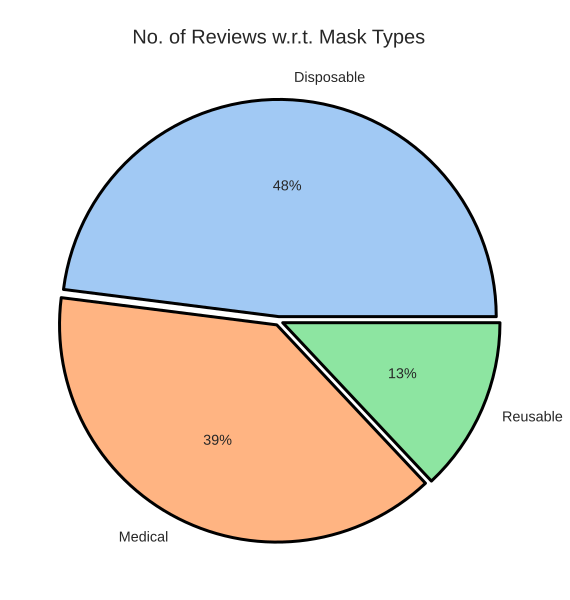

In [ ]:
colors = sns.color_palette('pastel')[0:3]
plt.figure(figsize=(10,10))
plt.pie(round(df.mask_type.value_counts(normalize=True), 2), 
        wedgeprops={'linewidth':3.0, 'edgecolor':'black'},
        textprops={'size':'x-large'},
        labels = ['Disposable','Medical', 'Reusable'], 
        colors = colors, 
        autopct = '%.0f%%', 
        explode = [0.02, 0.02, 0.02])
plt.title('\nNo. of Reviews w.r.t. Mask Types', fontdict = {'fontsize':20, 'fontweight':5})
plt.show()